In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/tsp-benchmark

ex1-cplex.csv  ex2-metaheuristic.csv  memoc.drawio  plots  random-baseline.csv


In [ ]:
# install latex
!apt update
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng --fix-missing

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 http://archive.ubuntu.co

python3 -m python.benchmark --program ./x64/Release/exact-cplex.exe --datasets .\tsp-datasets --output .\benchmark_results cplex-exact

In [ ]:
from os import path
from operator import itemgetter

import numpy as np
import pandas as pd


BENCHMARK_FOLDER = '/content/drive/MyDrive/tsp-benchmark'
PLOTS_FOLDER = f'{BENCHMARK_FOLDER}/plots/'

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('pgf')
matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'sans-serif',
    'font.sans-serif': 'Latin Modern',
    'text.latex.preamble': r'\usepackage{lmodern}',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

SMALL_SIZE = 13.5
MEDIUM_SIZE = 15
BIGGER_SIZE = 16

In [ ]:
import seaborn as sns

%matplotlib inline

PALETTE = sns.diverging_palette(h_neg=248, h_pos=2, s=74, l=43, sep=2, n=6, center='light')

def set_seaborn_theme(palette=None):
  if palette is None:
    palette = PALETTE

  sns.set_theme(context='paper',
                style='whitegrid',
                palette=palette,
                rc={
                    "font.size": SMALL_SIZE,             # controls default text sizes
                    "xtick.labelsize": SMALL_SIZE,       # x axes tick label
                    "ytick.labelsize": SMALL_SIZE,       # y axes tick labels
                    "axes.labelsize": BIGGER_SIZE,       # x and y title labels
                    "legend.fontsize": MEDIUM_SIZE,      # legend font size
                    "legend.title_fontsize": MEDIUM_SIZE # legend title size
                })

In [ ]:
def read_csv(filepath: str):
  return pd.read_csv(filepath, sep=',', decimal='.', encoding='utf-8',
                     index_col=None)

In [ ]:
dataset_to_optimal_solution_map = {
    'd198': 15780,
    'd493': 35002,
    'd657': 48912,
    'd1291': 50801,
    'd1655': 62128,
    'd2103': 80450,
    'd15112': 1573084,
    'd18512': 645238,

    'sim-grid-A-010': 3876,
    'sim-grid-A-015': 3764,
    'sim-grid-A-020': 5374,
    'sim-grid-A-025': 5317,
    'sim-grid-A-030': 5459,
    'sim-grid-A-035': 5845,
    'sim-grid-A-040': 6098,
    'sim-grid-A-045': 5833,
    'sim-grid-A-050': 5959,
    'sim-grid-A-055': 6561,
    'sim-grid-A-060': 7220,
    'sim-grid-A-065': 7821,
    'sim-grid-A-070': 7623,
    'sim-grid-A-075': 15235,
    'sim-grid-A-080': 16966,
    'sim-grid-A-085': 16587,
    'sim-grid-A-090': 16681,
    'sim-grid-A-095': 17625,
    'sim-grid-A-100': 18109,
    'sim-grid-A-200': 38488,  # upper bound

    'sim-grid-B-010': 3533,
    'sim-grid-B-015': 4235,
    'sim-grid-B-020': 4888,
    'sim-grid-B-025': 4916,
    'sim-grid-B-030': 5115,
    'sim-grid-B-035': 6481,
    'sim-grid-B-040': 5808,
    'sim-grid-B-045': 6579,
    'sim-grid-B-050': 6307,
    'sim-grid-B-055': 6888,
    'sim-grid-B-060': 7188,
    'sim-grid-B-065': 7433,
    'sim-grid-B-070': 7545,
    'sim-grid-B-075': 16163,
    'sim-grid-B-080': 15709,
    'sim-grid-B-085': 16270,
    'sim-grid-B-090': 16326,
    'sim-grid-B-095': 17321,
    'sim-grid-B-100': 18001,
    'sim-grid-B-200': 37030,  # upper bound
}

def get_optimal(dataset: str) -> int:
  return dataset_to_optimal_solution_map[dataset]

## Import benchmark for ex1-metaheuristic

In [ ]:
df_ex1_cplex = read_csv(path.join(BENCHMARK_FOLDER, 'ex1-cplex.csv')) \
  .astype({ 'was_interrupted': bool, 'solution': float })
df_ex1_cplex.sort_values(by=['dataset'], axis=0, ascending=True, inplace=True)
df_ex1_cplex.head(1000)

,dataset,N,solution,program_time_ms,was_interrupted,timeout_ms
0,d1291,1291,NaN,12582,True,100
24,d1291,1291,NaN,23847,True,10000
25,d1291,1291,NaN,23825,True,10000
26,d1291,1291,NaN,23851,True,10000
27,d1291,1291,NaN,23838,True,10000
...,...,...,...,...,...,...
971,sim-grid-B-095,95,57009.0,154,True,100
972,sim-grid-B-095,95,57009.0,152,True,100
974,sim-grid-B-095,95,57009.0,152,True,100
975,sim-grid-B-095,95,57009.0,196,True,100


## Import benchmark for ex2-metaheuristic

In [ ]:
df_ex2_metaheuristic = read_csv(path.join(BENCHMARK_FOLDER, 'ex2-metaheuristic.csv')) \
  .astype({ 'was_interrupted': bool, 'solution': float })
df_ex2_metaheuristic.sort_values(by=['dataset'], axis=0, ascending=True, inplace=True)
df_ex2_metaheuristic.head(1000)

,dataset,N,solution,best_of_generations,heuristic_cost,initial_best_cost,initial_improved_cost,timeout_ms,program_time_ms,was_interrupted
0,d1291,1291,61959.0,61959,61959,61959,61959,100,3681.0,True
24,d1291,1291,61957.0,61957,61959,61959,61959,10000,13453.0,True
25,d1291,1291,61952.0,61952,61959,61959,61959,10000,13404.0,True
26,d1291,1291,61952.0,61952,61959,61959,61959,10000,13388.0,True
27,d1291,1291,61952.0,61952,61959,61959,61959,10000,13461.0,True
...,...,...,...,...,...,...,...,...,...,...
971,sim-grid-B-095,95,18230.0,18230,18336,18336,18336,100,112.0,True
972,sim-grid-B-095,95,18305.0,18305,18336,18336,18336,100,112.0,True
974,sim-grid-B-095,95,18305.0,18305,18336,18336,18336,100,110.0,True
975,sim-grid-B-095,95,18305.0,18305,18336,18336,18336,100,108.0,True


## Import benchmark for random baseline

In [ ]:
df_random_baseline = read_csv(path.join(BENCHMARK_FOLDER, 'random-baseline.csv')) \
  .astype({ 'was_interrupted': bool, 'solution': float })
df_random_baseline.sort_values(by=['dataset'], axis=0, ascending=True, inplace=True)
df_random_baseline.head(1000)

,dataset,N,solution,program_time_ms,was_interrupted,timeout_ms
0,d1291,1291,150852.0,104,True,100
24,d1291,1291,150852.0,10002,True,10000
25,d1291,1291,150852.0,10001,True,10000
26,d1291,1291,150852.0,10002,True,10000
27,d1291,1291,150852.0,10002,True,10000
...,...,...,...,...,...,...
971,sim-grid-B-095,95,57009.0,101,True,100
972,sim-grid-B-095,95,57009.0,102,True,100
974,sim-grid-B-095,95,57009.0,101,True,100
975,sim-grid-B-095,95,57009.0,101,True,100


In [ ]:
def compute_gap(mean_solution: float, dataset: str) -> float:
  # relative error

  optimal_solution = get_optimal(dataset)
  return abs((mean_solution - optimal_solution)) * 100.0 / optimal_solution

We want to show an aggregated table containing the average, standard deviation, minimum and maximum program times for each benchmark execution.
We wish to exclude from such aggregation the benchmarks which were interrupted at least once given a dataset and a timeout.
The result should be sorted by the number of nodes and the name of the dataset.


In [ ]:
def filter_interrupted(was_interrupted):
  def keep_only_interrupted(x):
    '''Keep grouped benchmarks that have been interrupted at least once'''
    return (x['was_interrupted']).any()

  def keep_only_not_interrupted(x):
    '''Keep grouped benchmarks that have never been interrupted'''
    return (~x['was_interrupted']).all()

  def filter_interrupted_inner(df):
    return df.filter(keep_only_interrupted if was_interrupted else
                     keep_only_not_interrupted)
    
  return filter_interrupted_inner

In [ ]:
def aggregate_time_and_solution_statistics(df):
  aggregated_df = df \
    .agg(
      mean_ms=pd.NamedAgg(column='program_time_ms', aggfunc=np.mean),
      std_ms=pd.NamedAgg(column='program_time_ms', aggfunc=np.std),
      min_ms=pd.NamedAgg(column='program_time_ms', aggfunc=np.min),
      max_ms=pd.NamedAgg(column='program_time_ms', aggfunc=np.max),

      mean_solution=pd.NamedAgg(column='solution', aggfunc=np.mean),
      std_solution=pd.NamedAgg(column='solution', aggfunc=np.std),
      min_solution=pd.NamedAgg(column='solution', aggfunc=np.min),
      max_solution=pd.NamedAgg(column='solution', aggfunc=np.max),
    ) \
    .sort_values(by=['N', 'dataset'])

  aggregated_df.reset_index(drop=True, inplace=True)
  return aggregated_df

In [ ]:
def show_time_stats_by_timeout(df: pd.DataFrame, timeout_ms: int, was_interrupted: bool):
  grouped_df = filter_interrupted(was_interrupted)(
    df[df['timeout_ms'].isin([timeout_ms])] \
      .groupby(['dataset', 'N', 'timeout_ms'], as_index=False)
  ).groupby(['dataset', 'N', 'timeout_ms', 'was_interrupted'], as_index=False)

  aggregated_df = aggregate_time_and_solution_statistics(grouped_df)

  ROW_WISE = 1

  aggregated_df.drop(['timeout_ms', 'was_interrupted'], axis=ROW_WISE, inplace=True)

  # for each row, compute the gap between the mean and the optimal solution
  mean_gap = aggregated_df.apply(
      lambda row: compute_gap(row['mean_solution'], dataset=row['dataset']),
      axis=ROW_WISE, result_type='reduce')
  
  min_gap = aggregated_df.apply(
    lambda row: compute_gap(row['min_solution'], dataset=row['dataset']),
    axis=ROW_WISE, result_type='reduce')
  
  max_gap = aggregated_df.apply(
    lambda row: compute_gap(row['max_solution'], dataset=row['dataset']),
    axis=ROW_WISE, result_type='reduce')

  aggregated_df['mean_gap'] = mean_gap
  aggregated_df['min_gap'] = min_gap
  aggregated_df['max_gap'] = max_gap
  
  return aggregated_df

In [ ]:
def compute_gap_divergence(df: pd.DataFrame, timeout_ms: float,
                           was_interrupted: bool):
  aggregated_df = df[['dataset', 'solution', 'timeout_ms', 'was_interrupted']] \
    .query(f'timeout_ms == {timeout_ms} & was_interrupted == {was_interrupted}') \
    .drop(columns=['timeout_ms', 'was_interrupted']) \
    .groupby(['dataset']) \
    .agg(
      mean_solution=pd.NamedAgg(column='solution', aggfunc=np.mean),
      min_solution=pd.NamedAgg(column='solution', aggfunc=np.min),
      max_solution=pd.NamedAgg(column='solution', aggfunc=np.max),
    ).reset_index()

  # for each row, compute the gap between the mean and the optimal solution
  mean_gap = aggregated_df.apply(
    lambda row: compute_gap(row['mean_solution'], dataset=row['dataset']),
    axis=1, result_type='reduce')

  min_gap = aggregated_df.apply(
    lambda row: compute_gap(row['min_solution'], dataset=row['dataset']),
    axis=1, result_type='reduce')

  max_gap = aggregated_df.apply(
    lambda row: compute_gap(row['max_solution'], dataset=row['dataset']),
    axis=1, result_type='reduce')

  aggregated_df['mean_gap'] = mean_gap
  aggregated_df['min_gap'] = min_gap
  aggregated_df['max_gap'] = max_gap

  data = aggregated_df \
    .drop(columns=['mean_solution', 'min_solution', 'max_solution']) \
    .set_index('dataset', append=True) \
      .stack(level=-1) \
      .reset_index(level=0, drop=True) \
      .to_frame() \
      .reset_index() \
      .rename(columns={'level_1': 'gap_type', 0: 'gap'})

  data['gap_type'].replace({
    'mean_gap': 'Avg',
    'min_gap': 'Min',
    'max_gap': 'Max',
  }, inplace=True)

  return data

In [ ]:
from typing import Tuple


def plot_gap_divergence(df: pd.DataFrame, size_inches: Tuple[float, float],
                        prefix: str, suffix: str, xrotation: int = 0):
  if df.shape[0] == 0:
    print(f'No data available')
    return

  fig, ax = plt.subplots()
  fig.set_size_inches(size_inches)
  set_seaborn_theme()

  sns.pointplot(data=df, x='dataset', y='gap', hue='gap_type',
                ax=ax, dodge=False)

  # Put the legend out of the figure
  plt.legend(bbox_to_anchor=(1.03, 1), loc=2, borderaxespad=0, title='Gap type',
             title_fontsize='large')

  ax.set_xlabel('Dataset')
  ax.set_ylabel('Solution gap')
  
  for item in ax.get_xticklabels():
    item.set_rotation(xrotation)

  sns.despine(fig=fig)

  filename = f'{PLOTS_FOLDER}{prefix}-gap_divergence-{suffix}'
  print(filename)
  fig.savefig(f'{filename}.pgf', dpi=100, bbox_inches='tight')
  fig.savefig(f'{filename}.png', dpi=100)

In [ ]:
def filter_simulated_datasets(df: pd.DataFrame, simulated: bool):
  dataset_filter = df.dataset.str.startswith(('sim-grid-B'))
  
  if simulated:
    return df[dataset_filter]

  return df[~dataset_filter]

In [ ]:
def interrupted_to_str(interrupted: bool) -> str:
  if interrupted:
    return 'interrupted'
  
  return 'not_interrupted'

In [ ]:
def simulated_to_str(simulated: bool) -> str:
  if simulated:
    return 'simulated'

  return 'not_simulated'

## Solution plot with means

Show the plots of the min, max, and average solutions found by all implementations showing the mean minimum, mean maximum, and mean average solution for each implementation.

In [ ]:
def concat_aggregated_solutions(df_ex1_cplex: pd.DataFrame,
                                df_ex2_metaheuristic: pd.DataFrame,
                                df_random_baseline: pd.DataFrame) -> pd.DataFrame:
  columns = ['dataset', 'N', 'solution', 'was_interrupted', 'timeout_ms']

  def aggregate_helper(df: pd.DataFrame, program: str):
    return df[columns] \
      .query(f'timeout_ms == {timeout_ms}') \
      .assign(program=program) \
      .set_index('dataset') \
      .groupby(['dataset', 'program']) \
      .agg(
        mean_solution=pd.NamedAgg(column='solution', aggfunc=np.mean),
        min_solution=pd.NamedAgg(column='solution', aggfunc=np.min),
        max_solution=pd.NamedAgg(column='solution', aggfunc=np.max),
      )

  return pd.concat([
    aggregate_helper(df=df_ex1_cplex, program='ex1-cplex'),
    aggregate_helper(df=df_ex2_metaheuristic, program='ex2-metaheuristic'),
    aggregate_helper(df=df_random_baseline, program='random-baseline'),
  ], axis=0, join='inner').reset_index()

In [ ]:
def compute_mean_gap_in_df(df):
  return df.apply(lambda row: compute_gap(row['mean_solution'],
                                          dataset=row['dataset']),
                  axis=1, result_type='reduce')

In [ ]:
def aggregate_multiple_dataframe_solutions(timeout_ms: int, simulated: bool):
  return concat_aggregated_solutions(
    df_ex1_cplex=filter_simulated_datasets(
      df=df_ex1_cplex.query(f'timeout_ms == {timeout_ms}'),
      simulated=simulated
    ),
    df_ex2_metaheuristic=filter_simulated_datasets(
      df=df_ex2_metaheuristic.query(f'timeout_ms == {timeout_ms}'),
      simulated=simulated
    ),
    df_random_baseline=filter_simulated_datasets(
      df=df_random_baseline.query(f'timeout_ms == {timeout_ms}'),
      simulated=simulated
    ),
  )

In [ ]:
def get_global_mean(df: pd.DataFrame, program: str, column = 'mean_solution') -> float:
  selection_df = df.query(f'program == "{program}"')

  if selection_df.count()[column] == 0:
    # if every entry in in column is NaN, we cannot aggregate
    return np.NaN

  return selection_df \
    .agg(
      global_mean=pd.NamedAgg(column=column, aggfunc=np.mean),
    ).values[0][0]

In [ ]:
def plot_solutions_with_means(timeout_ms: int, simulated: bool, y: str,
                              ylabel: str, size_inches: Tuple[float, float],
                              xrotation: int = 0):

  data = aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                                simulated=simulated)

  fig, ax = plt.subplots()
  fig.set_size_inches(size_inches)
  set_seaborn_theme()

  sns.pointplot(data=data, x='dataset', y=y, hue='program',
                ax=ax, dodge=True)

  ax.set_xlabel('Dataset')
  ax.set_ylabel(f'{ylabel} solution')

  for item in ax.get_xticklabels():
    item.set_rotation(xrotation)

  n_rows = data.shape[0]
  ex1_cplex_mean = get_global_mean(df=data, program='ex1-cplex',
                                  column=y)
  ex2_metaheuristic_mean = get_global_mean(df=data, program='ex2-metaheuristic',
                                          column=y)
  random_baseline_mean = get_global_mean(df=data, program='random-baseline',
                                         column=y)
  
  print(f'ex1_cplex_mean: {ex1_cplex_mean}\t ex2_metaheuristic_mean: {ex2_metaheuristic_mean}\t random_baseline_mean: {random_baseline_mean}')

  if not np.isnan(ex1_cplex_mean):
    ax.axhline(y=ex1_cplex_mean, ls=':', lw=2,
              color=PALETTE[0], label='Average ex1-cplex')

  if not np.isnan(ex2_metaheuristic_mean):
    ax.axhline(y=ex2_metaheuristic_mean, ls='-.', lw=2,
              color=PALETTE[1], label='Average ex2-metaheuristic')

  if not np.isnan(random_baseline_mean):
    ax.axhline(y=random_baseline_mean, ls='--', lw=2,
              color=PALETTE[2], label='Average random-baseline')

  # Put the legend out of the figure
  plt.legend(borderaxespad=0, title='Program', title_fontsize='large')

  sns.despine(fig=fig)

  filename = f'{PLOTS_FOLDER}{y}_with_means-{simulated_to_str(simulated)}-ms-{timeout_ms}'
  print(filename)

  fig.savefig(f'{filename}.pgf', dpi=100, bbox_inches='tight')
  fig.savefig(f'{filename}.png', dpi=100)

### timeout_ms: 100

In [ ]:
timeout_ms = 100

#### Simulated

In [ ]:
simulated = True

ex1_cplex_mean: 29200.736842105263	 ex2_metaheuristic_mean: 11159.118181818183	 random_baseline_mean: 35403.63636363637
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-simulated-ms-100


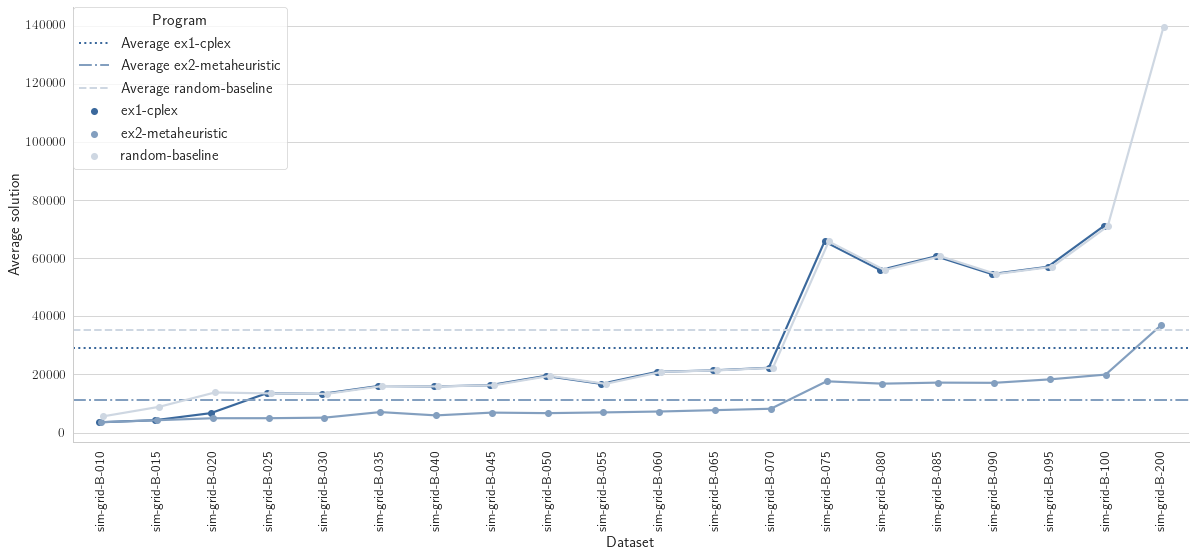

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 29200.736842105263	 ex2_metaheuristic_mean: 11122.5	 random_baseline_mean: 35220.4
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-simulated-ms-100


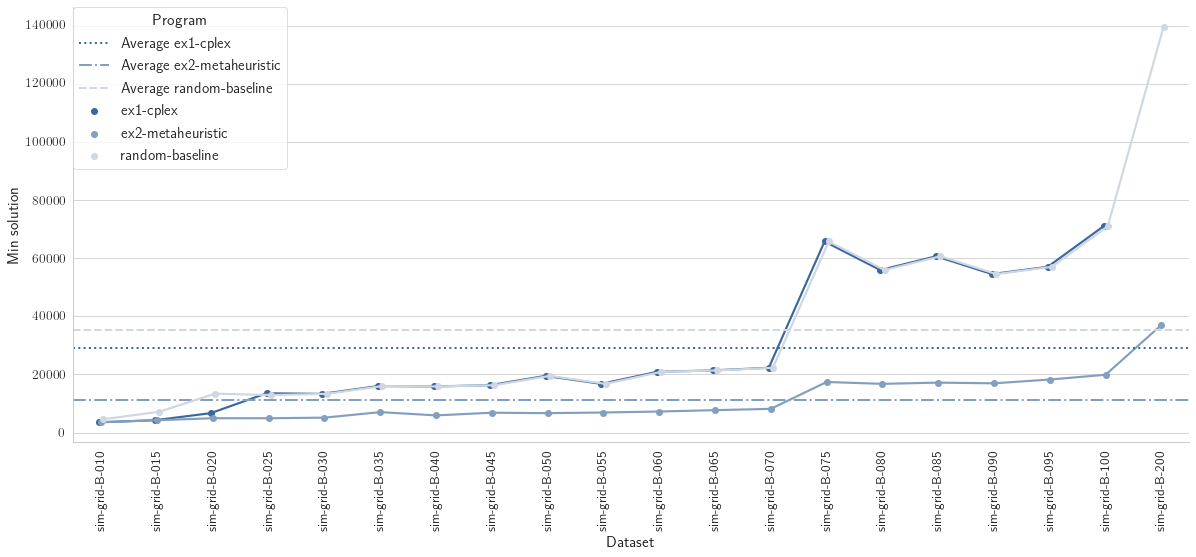

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 29200.736842105263	 ex2_metaheuristic_mean: 11177.1	 random_baseline_mean: 35447.25
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-simulated-ms-100


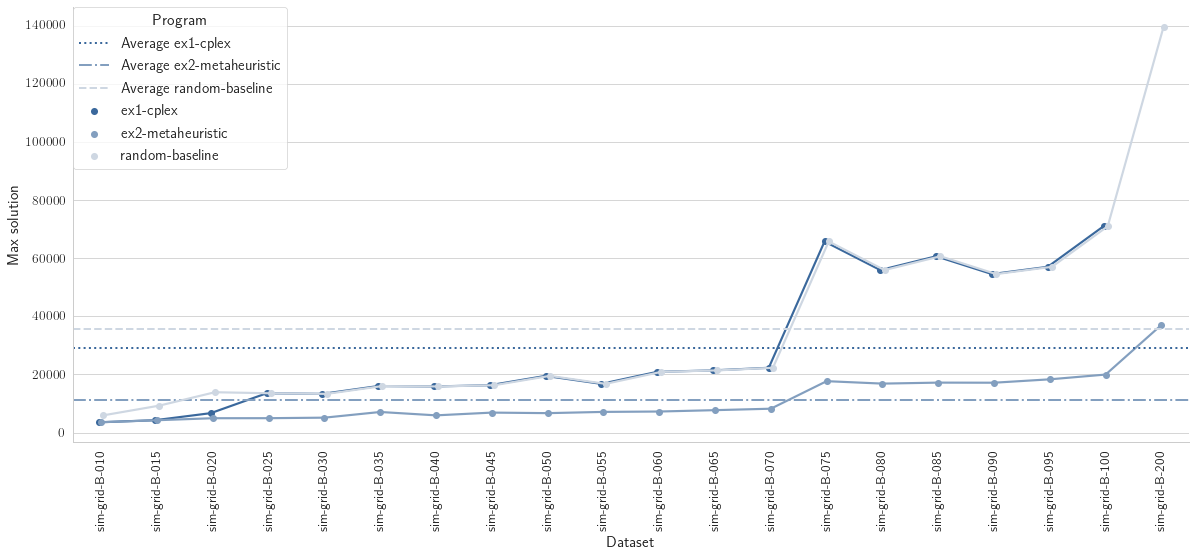

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

#### Not simulated

In [ ]:
simulated = False

ex1_cplex_mean: nan	 ex2_metaheuristic_mean: 48619.87272727273	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-not_simulated-ms-100


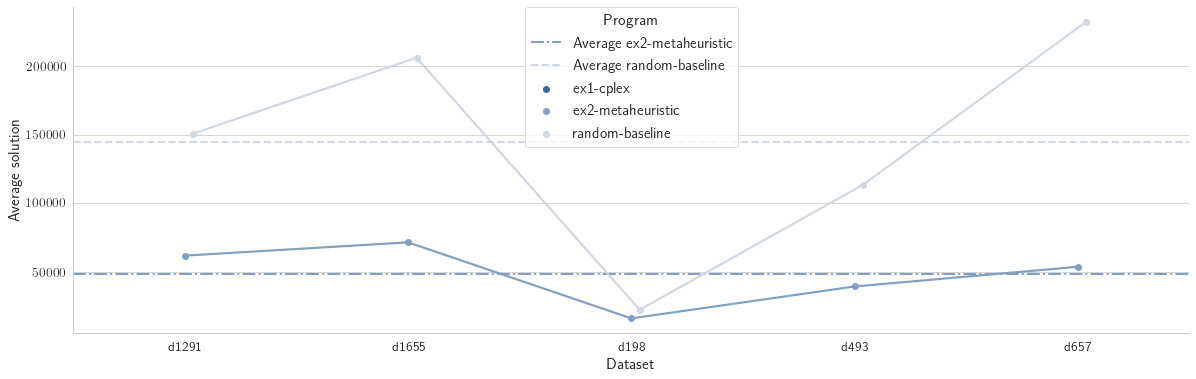

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 6), xrotation=0)

ex1_cplex_mean: nan	 ex2_metaheuristic_mean: 48591.6	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-not_simulated-ms-100


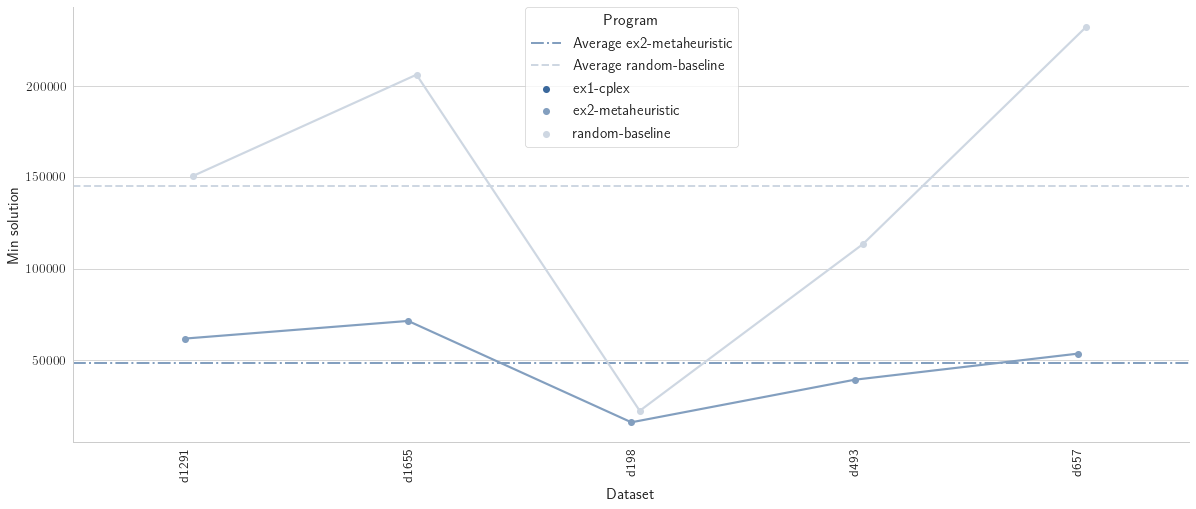

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: nan	 ex2_metaheuristic_mean: 48628.4	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-not_simulated-ms-100


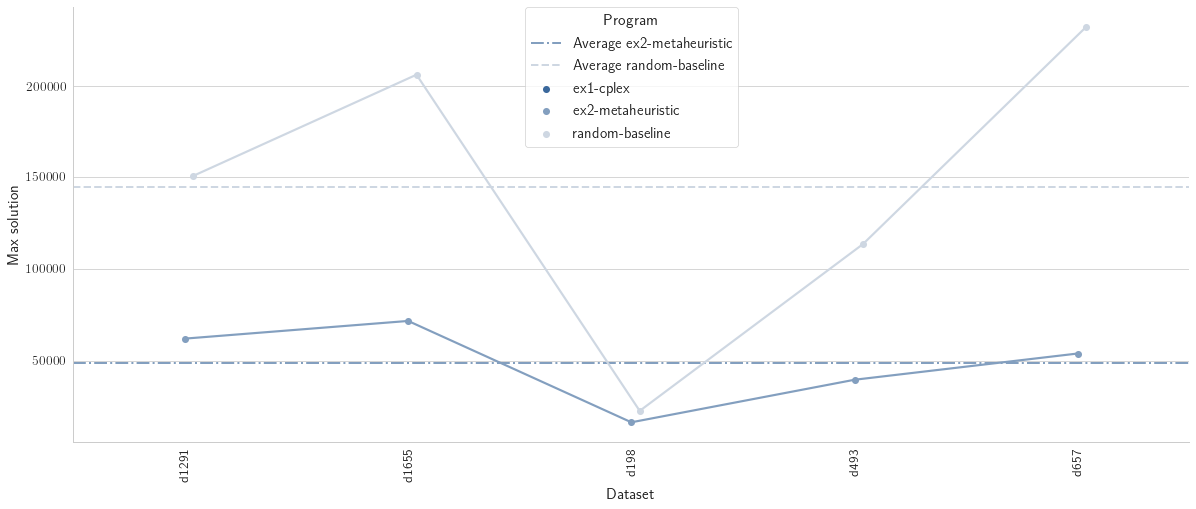

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

### timeout_ms: 1000

In [ ]:
timeout_ms = 1000

#### Simulated

In [ ]:
simulated = True

ex1_cplex_mean: 30592.918181818182	 ex2_metaheuristic_mean: 11110.327272727274	 random_baseline_mean: 35394.836363636365
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-simulated-ms-1000


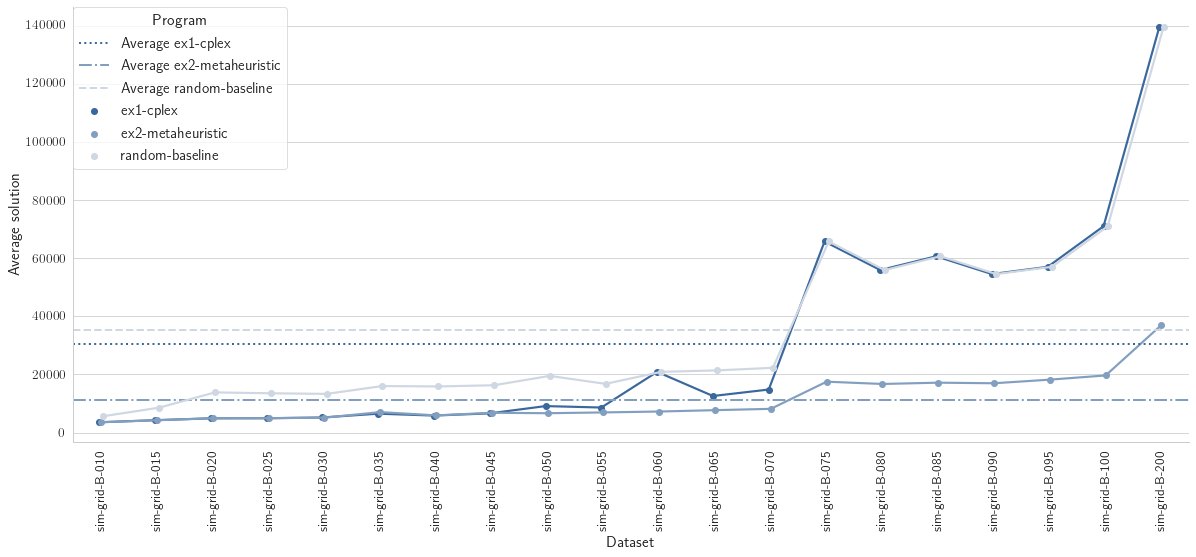

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 30468.9	 ex2_metaheuristic_mean: 11063.0	 random_baseline_mean: 35254.55
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-simulated-ms-1000


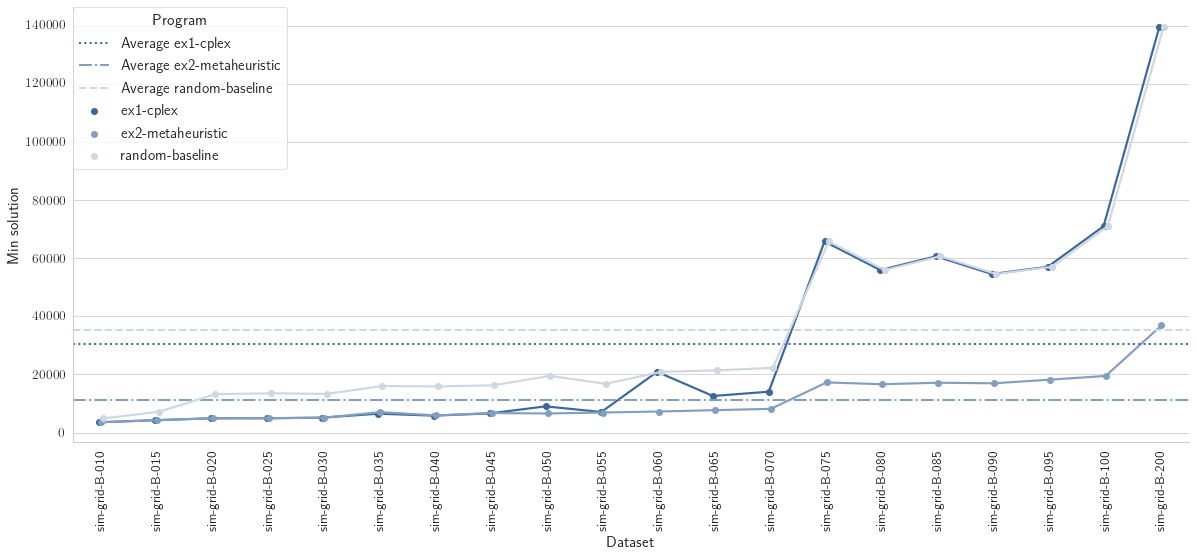

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 31049.95	 ex2_metaheuristic_mean: 11160.75	 random_baseline_mean: 35447.25
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-simulated-ms-1000


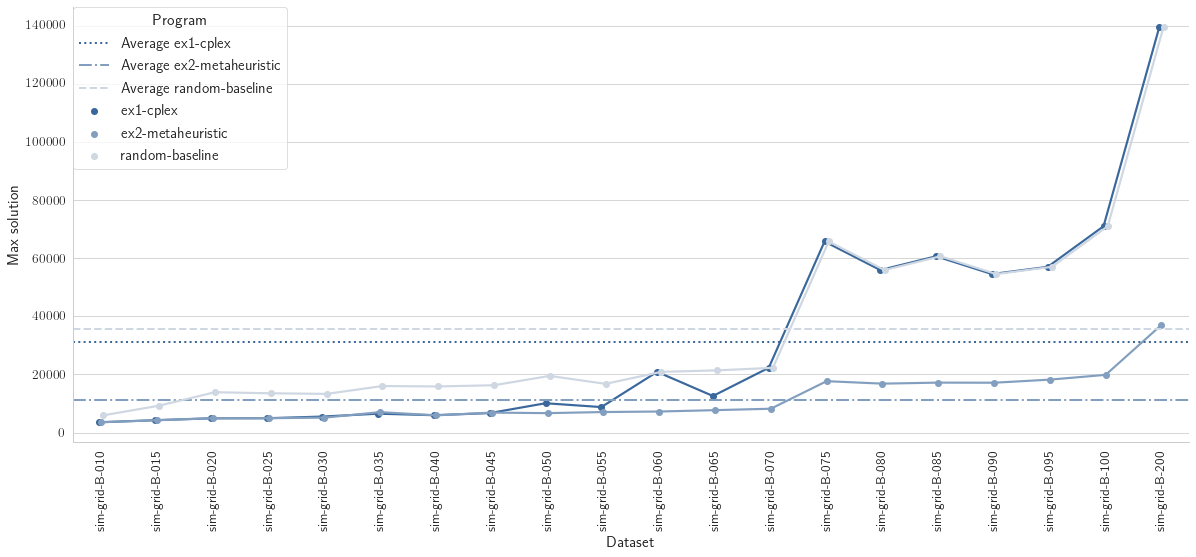

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

#### Not simulated

In [ ]:
simulated = False

ex1_cplex_mean: 22498.0	 ex2_metaheuristic_mean: 48592.781818181815	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-not_simulated-ms-1000


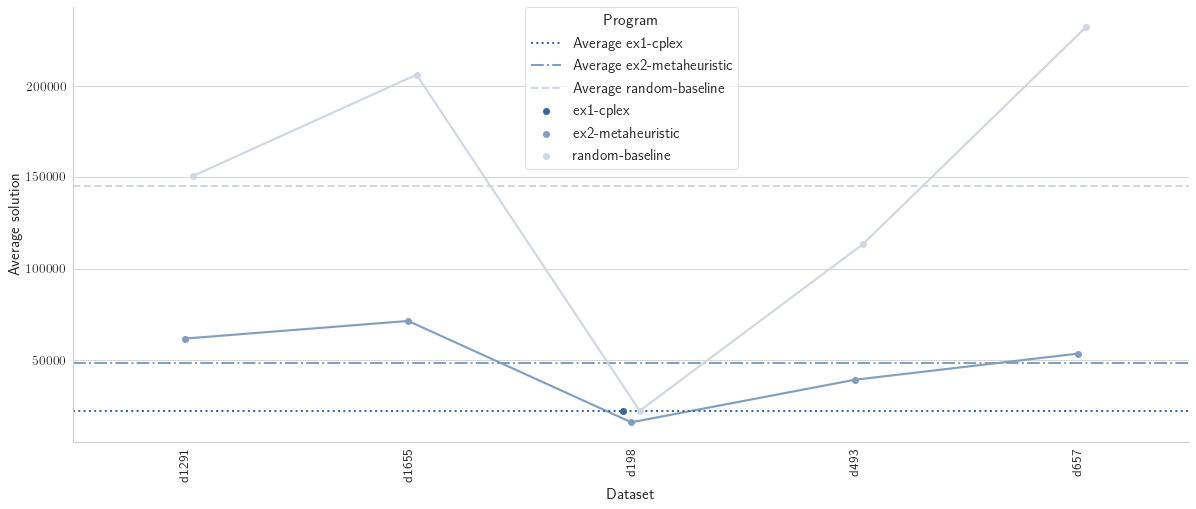

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 22498.0	 ex2_metaheuristic_mean: 48552.0	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-not_simulated-ms-1000


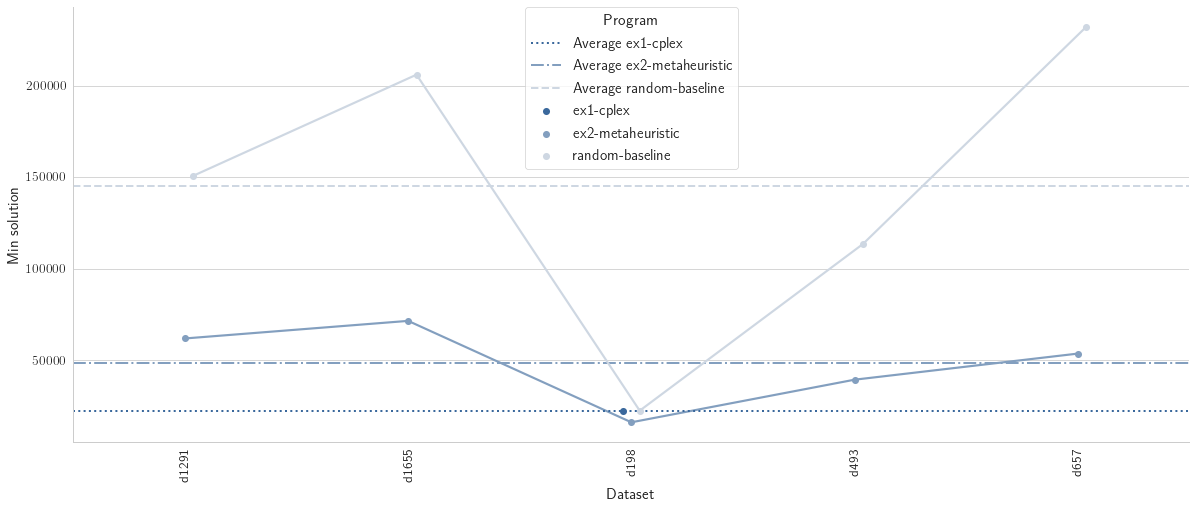

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 22498.0	 ex2_metaheuristic_mean: 48620.0	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-not_simulated-ms-1000


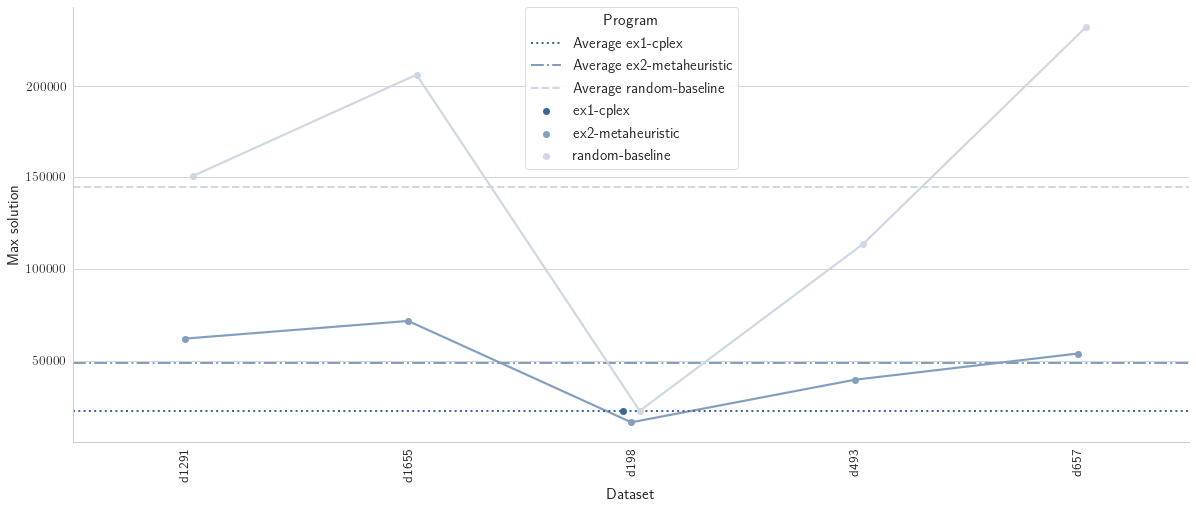

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

### timeout_ms: 10000

In [ ]:
timeout_ms = 10000

#### Simulated

In [ ]:
simulated = True

ex1_cplex_mean: 18157.272727272728	 ex2_metaheuristic_mean: 11087.968181818182	 random_baseline_mean: 35415.718181818185
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-simulated-ms-10000


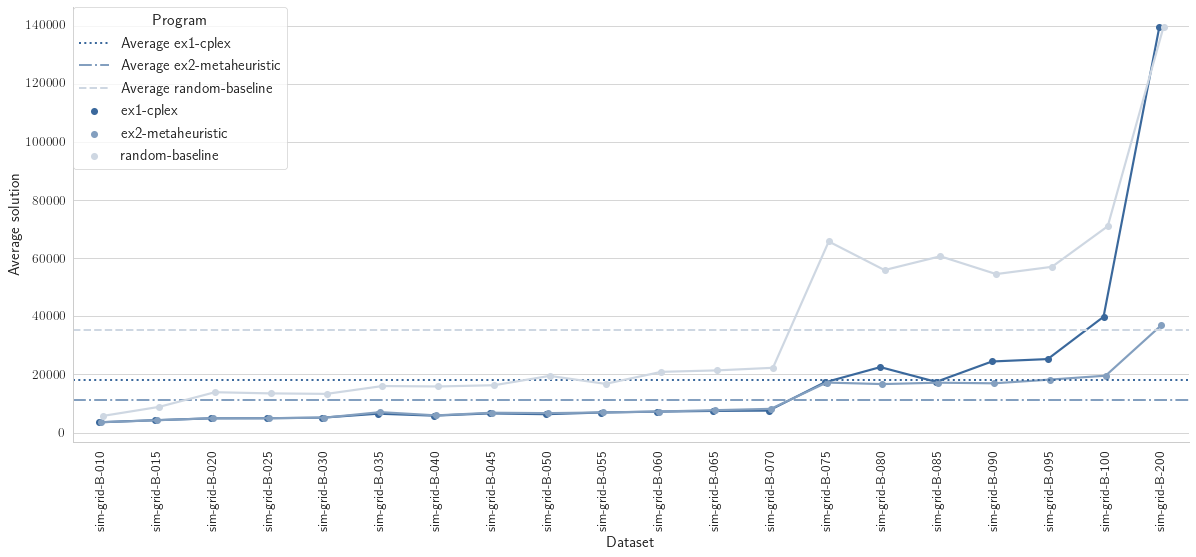

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 17173.3	 ex2_metaheuristic_mean: 11037.2	 random_baseline_mean: 35313.55
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-simulated-ms-10000


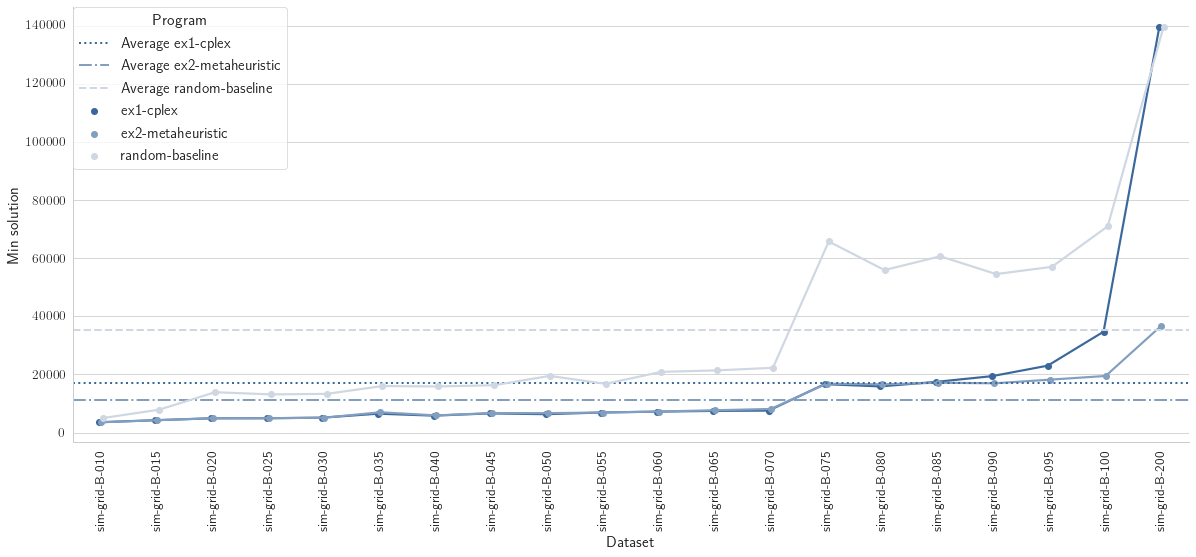

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 19214.95	 ex2_metaheuristic_mean: 11145.8	 random_baseline_mean: 35447.25
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-simulated-ms-10000


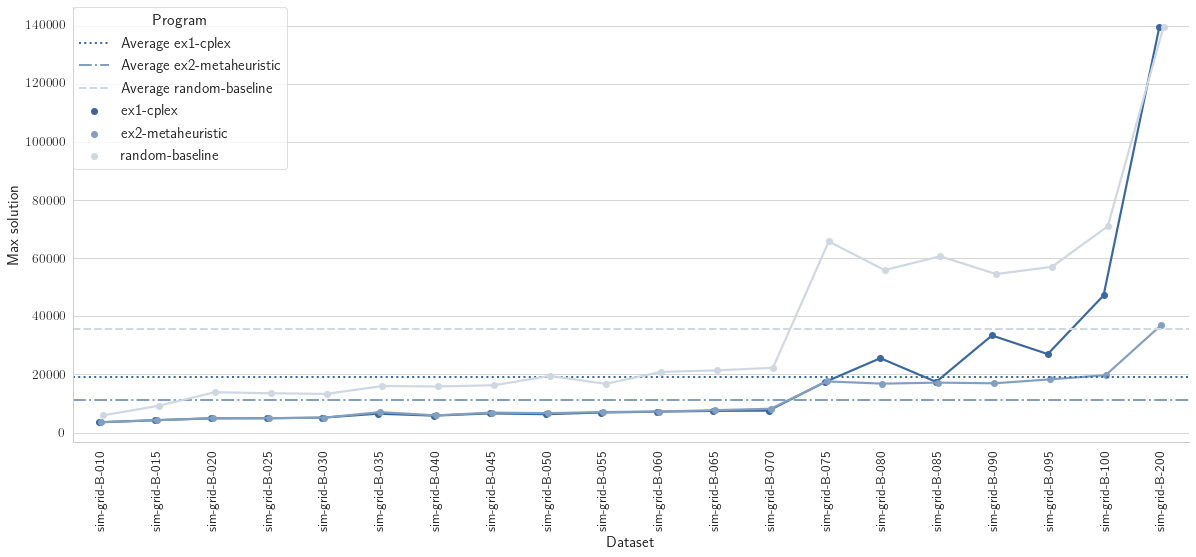

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

#### Not simulated

In [ ]:
simulated = False

ex1_cplex_mean: 121723.0	 ex2_metaheuristic_mean: 48550.12727272727	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-not_simulated-ms-10000


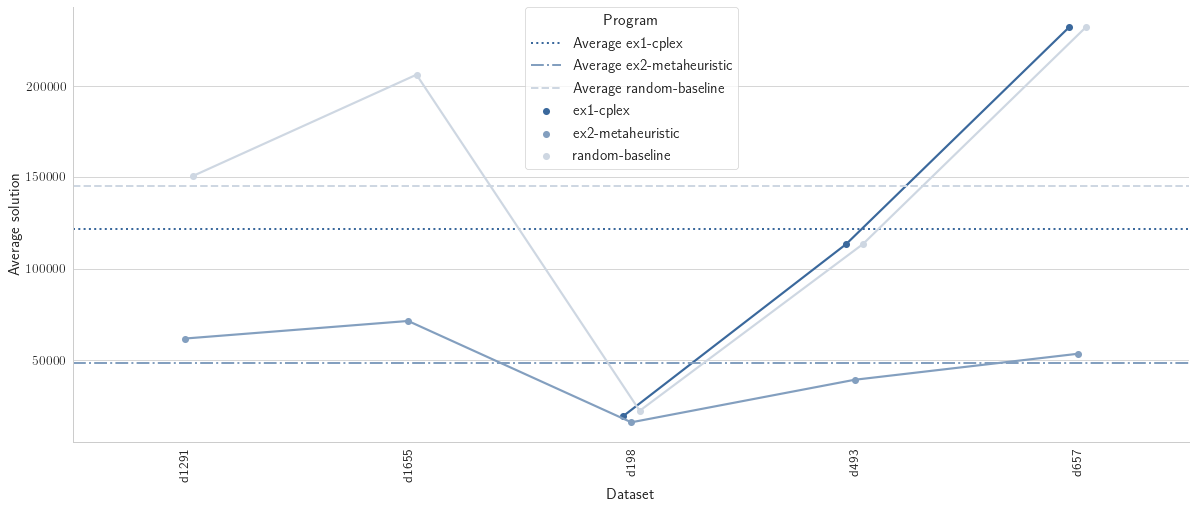

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 121723.0	 ex2_metaheuristic_mean: 48502.2	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-not_simulated-ms-10000


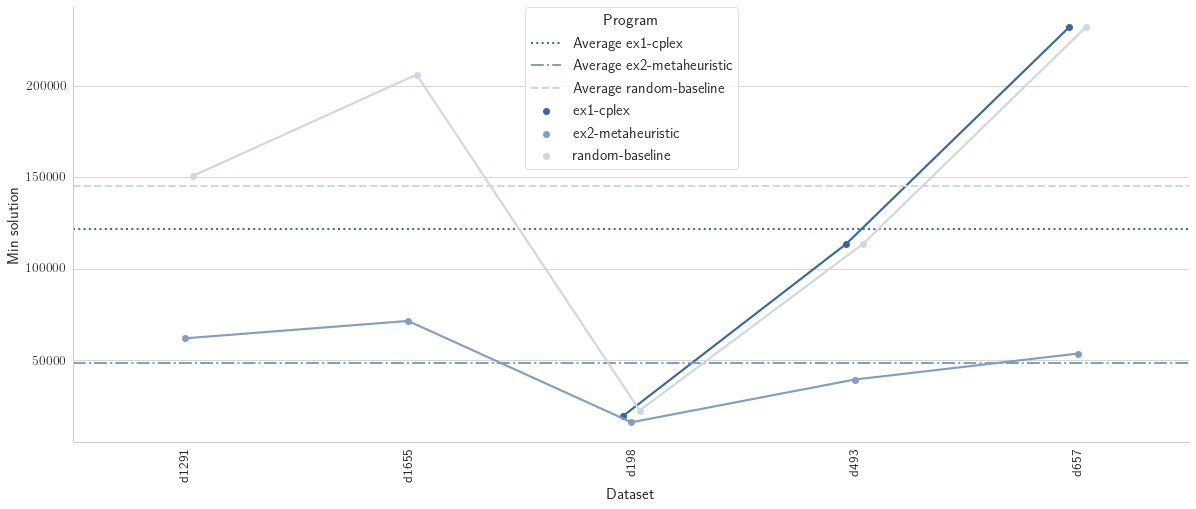

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 121723.0	 ex2_metaheuristic_mean: 48582.4	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-not_simulated-ms-10000


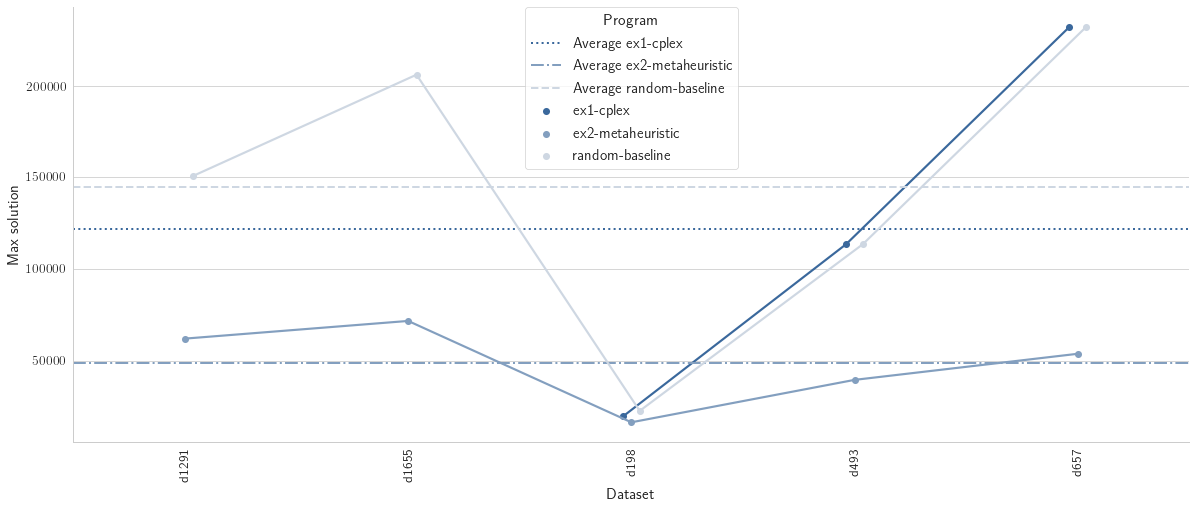

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

### timeout_ms: 60000

In [ ]:
timeout_ms = 60000

#### Simulated

In [ ]:
simulated = True

ex1_cplex_mean: 15817.154545454547	 ex2_metaheuristic_mean: 11089.636363636364	 random_baseline_mean: 35411.486363636366
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-simulated-ms-60000


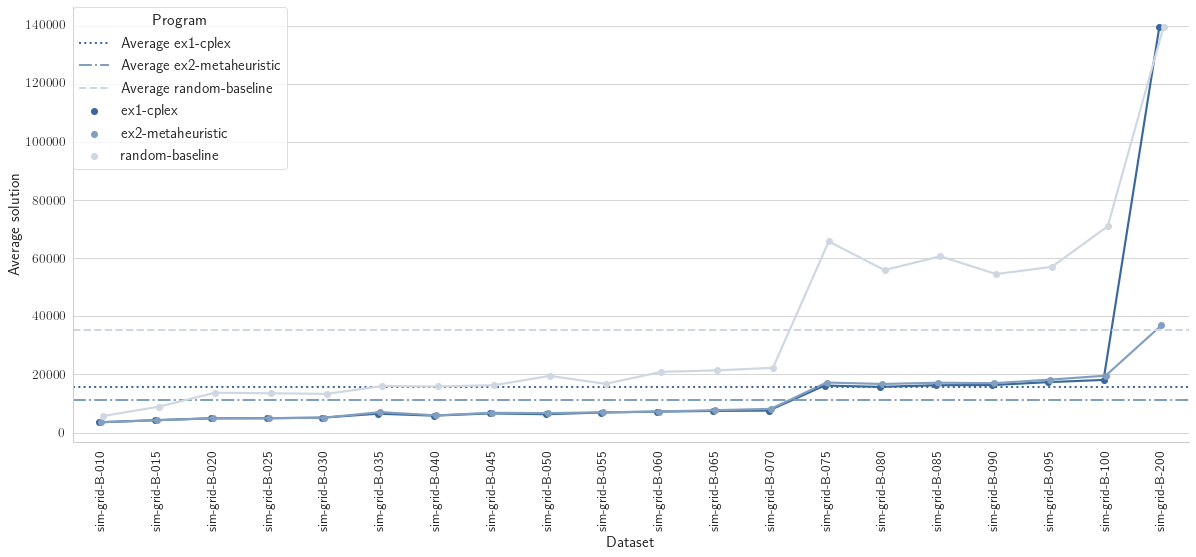

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 15812.25	 ex2_metaheuristic_mean: 11033.3	 random_baseline_mean: 35228.1
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-simulated-ms-60000


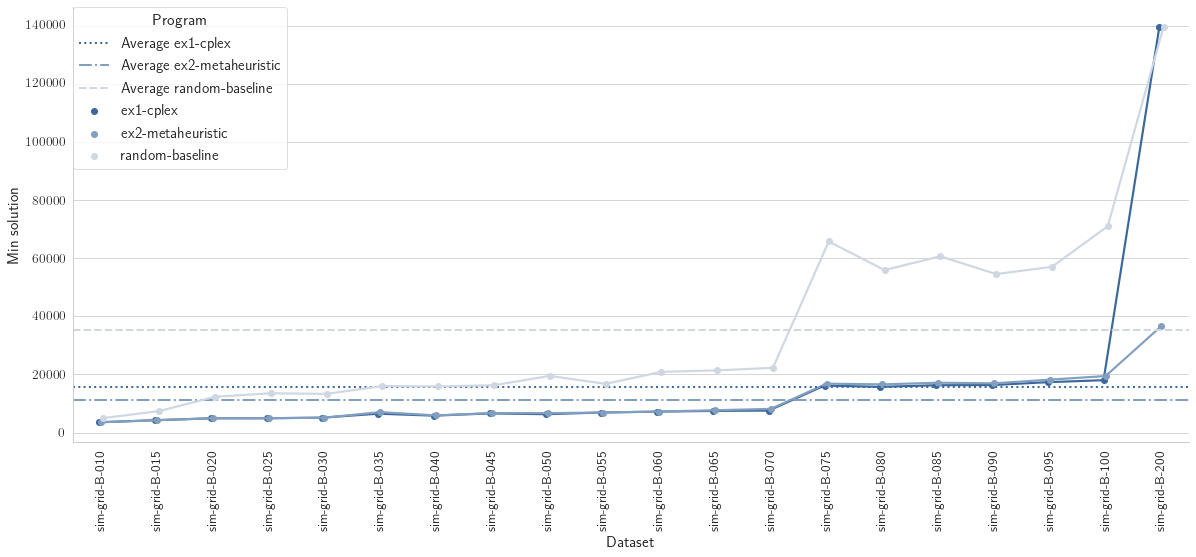

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 15837.4	 ex2_metaheuristic_mean: 11156.7	 random_baseline_mean: 35447.25
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-simulated-ms-60000


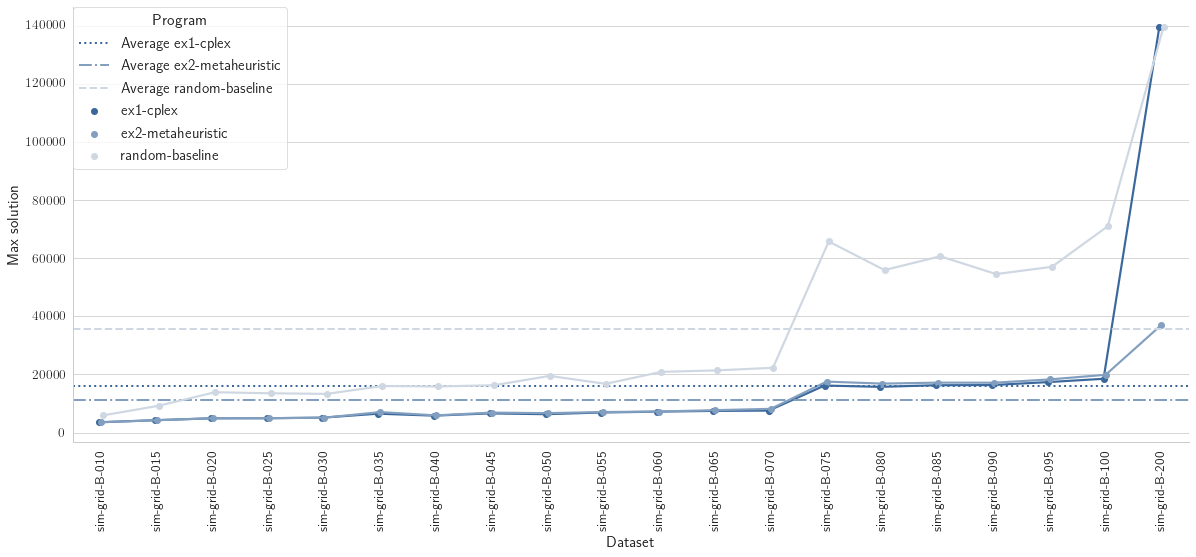

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

#### Not simulated

In [ ]:
simulated = False

ex1_cplex_mean: 144089.96363636362	 ex2_metaheuristic_mean: 48528.67272727272	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/mean_solution_with_means-not_simulated-ms-60000


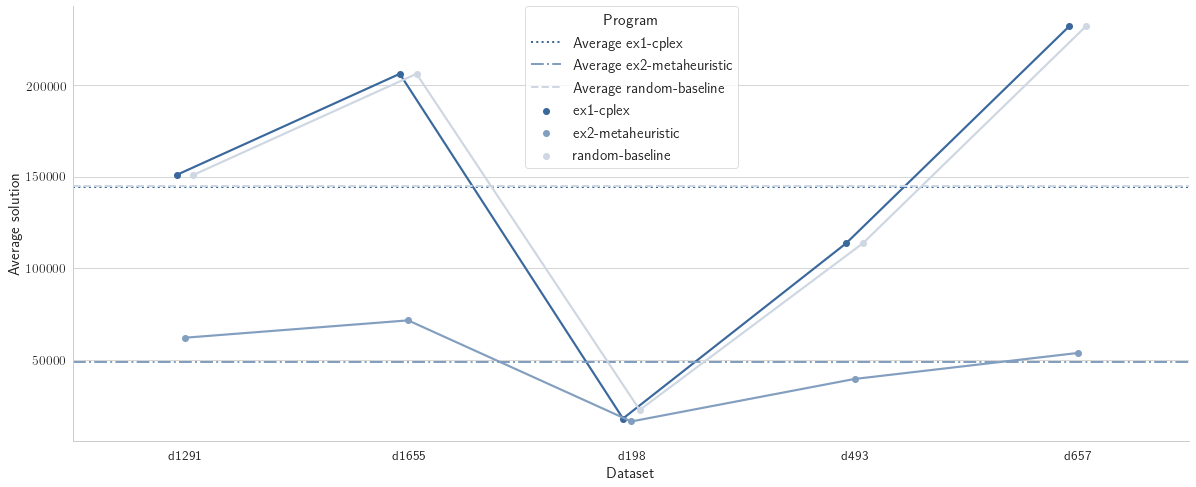

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='mean_solution', ylabel='Average',
                          size_inches=(20, 8), xrotation=0)

ex1_cplex_mean: 144087.6	 ex2_metaheuristic_mean: 48510.8	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/min_solution_with_means-not_simulated-ms-60000


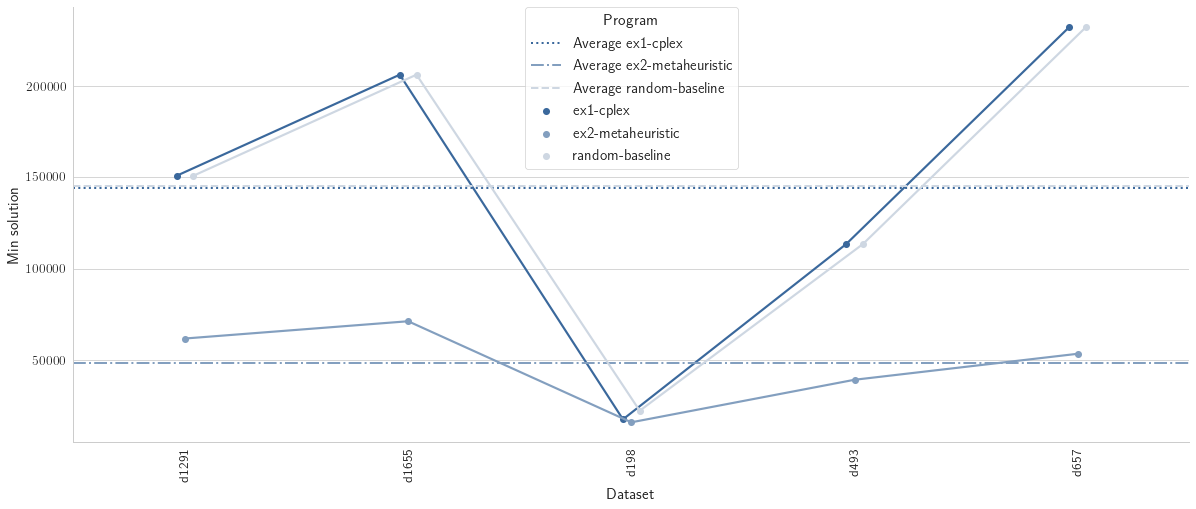

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='min_solution', ylabel='Min',
                          size_inches=(20, 8), xrotation=90)

ex1_cplex_mean: 144092.8	 ex2_metaheuristic_mean: 48547.8	 random_baseline_mean: 145029.0
/content/drive/MyDrive/tsp-benchmark/plots/max_solution_with_means-not_simulated-ms-60000


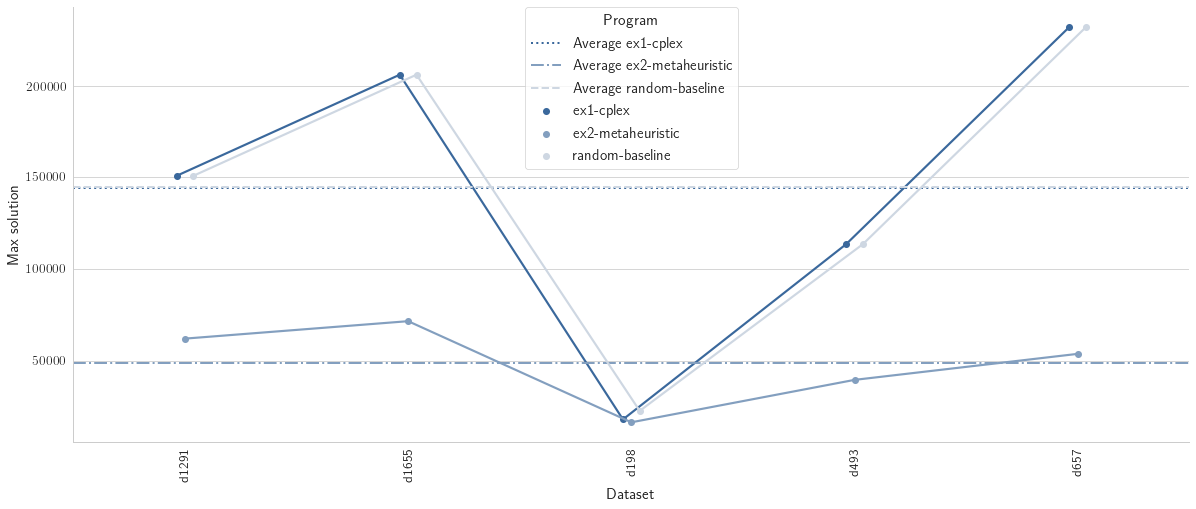

In [ ]:
plot_solutions_with_means(timeout_ms=timeout_ms, simulated=simulated,
                          y='max_solution', ylabel='Max',
                          size_inches=(20, 8), xrotation=90)

## Solution gap plot: ex1-cplex

Show the trend of the gaps with respect to the solution for the `ex1-cplex` implementation, fixing a timeout and distinguished between interrupted and not interrupted executions.

### timeout_ms: 100

In [ ]:
timeout_ms = 100

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-100-not_interrupted


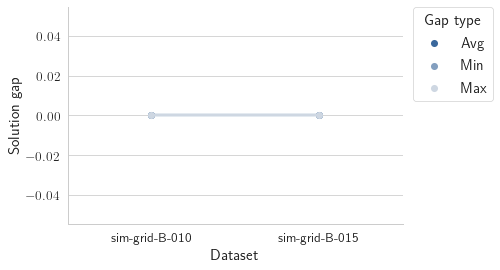

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(6, 4), xrotation=0,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-100-interrupted


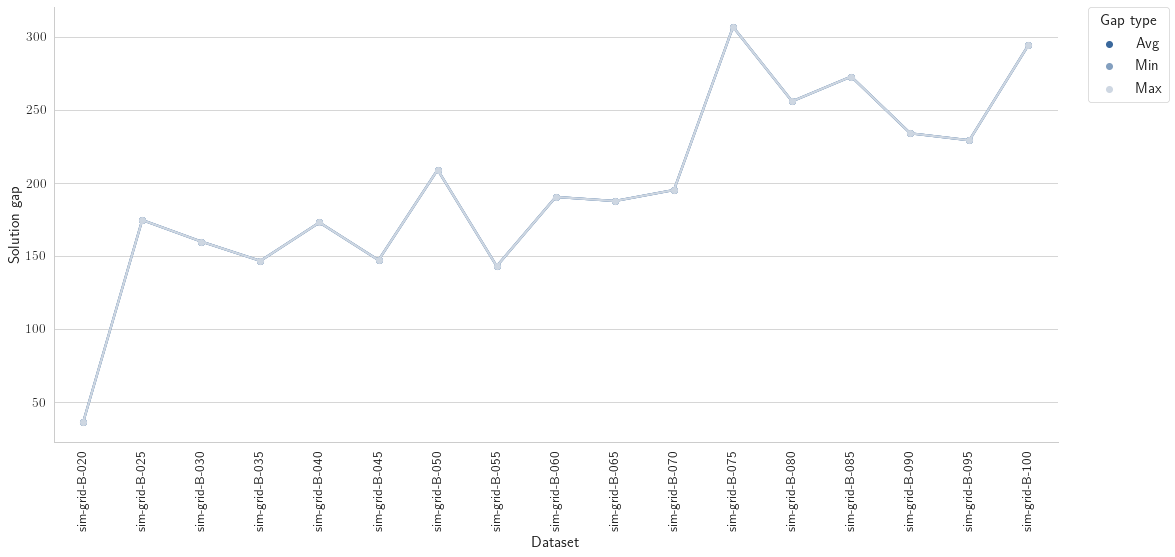

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


### timeout_ms: 1000

In [ ]:
timeout_ms = 1000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-1000-not_interrupted


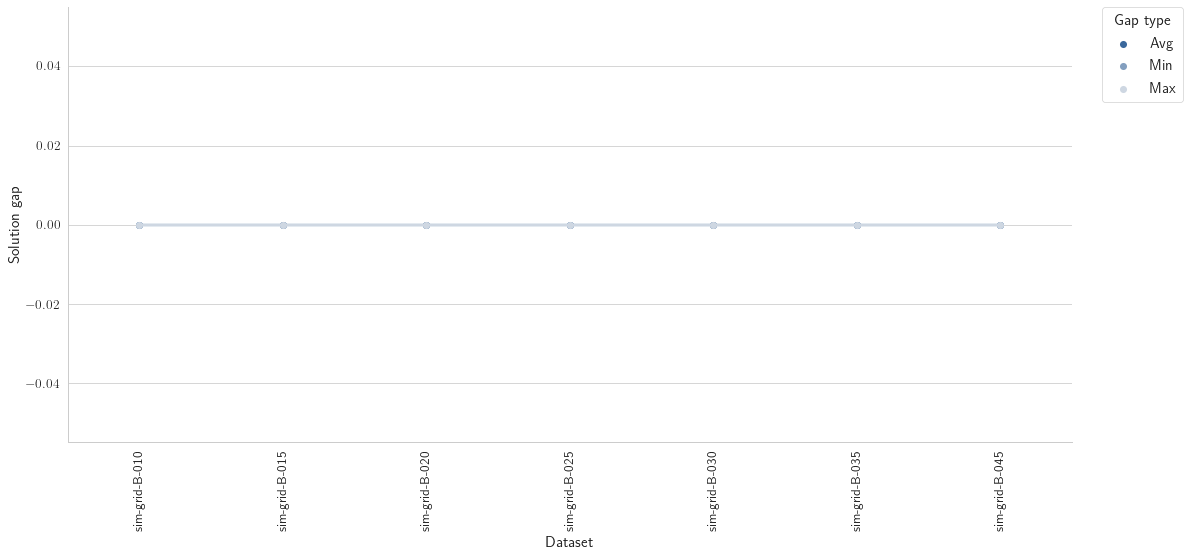

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-1000-interrupted


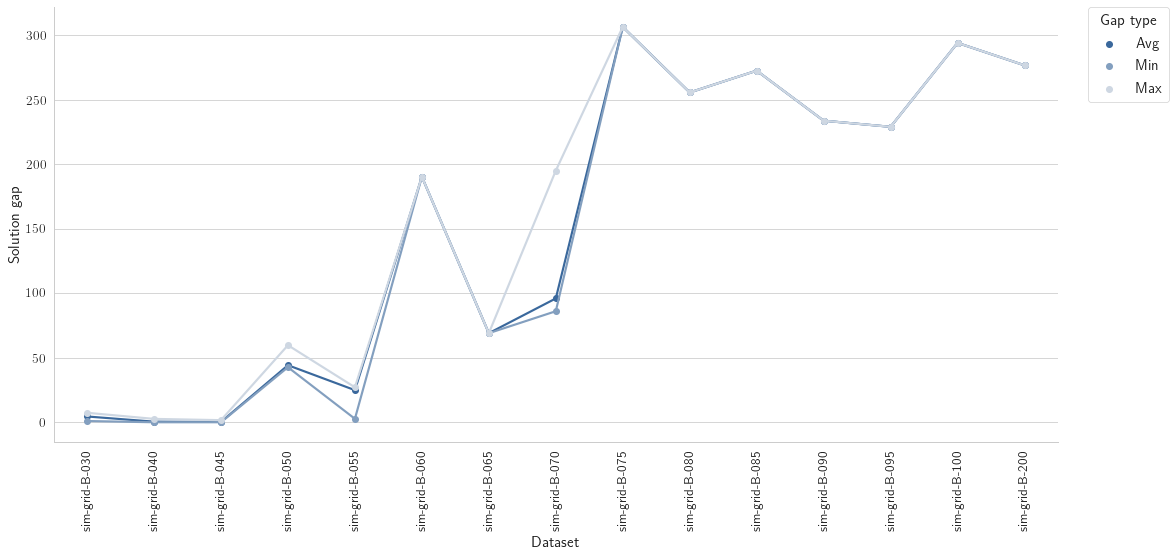

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-non_simulated-gap_divergence-ms-1000-interrupted


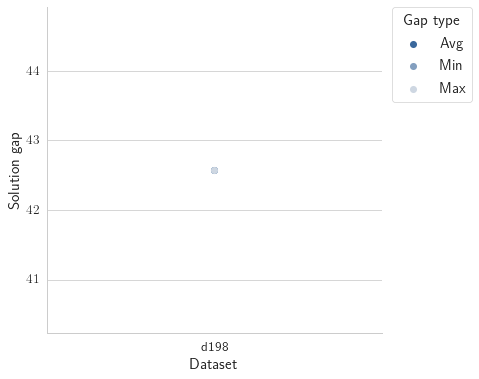

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

### timeout_ms: 10000

In [ ]:
timeout_ms = 10000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-10000-not_interrupted


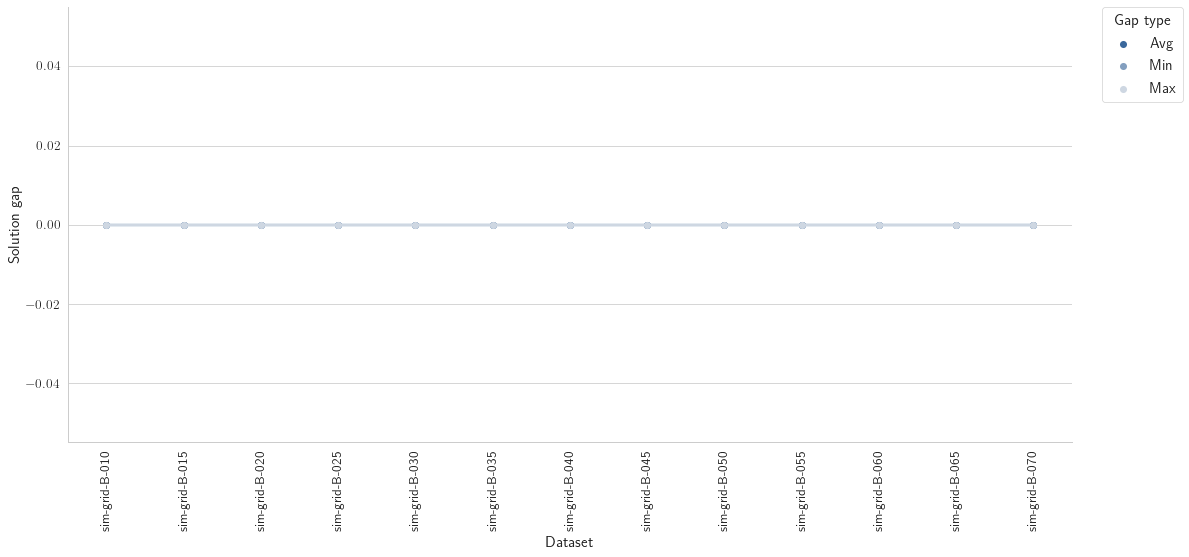

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-10000-interrupted


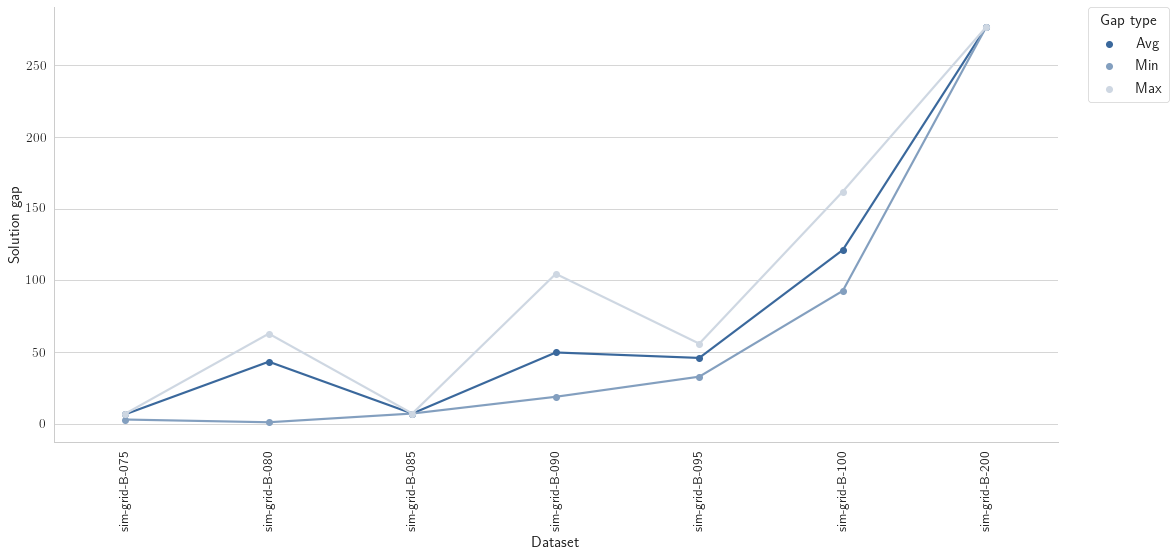

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-non_simulated-gap_divergence-ms-10000-interrupted


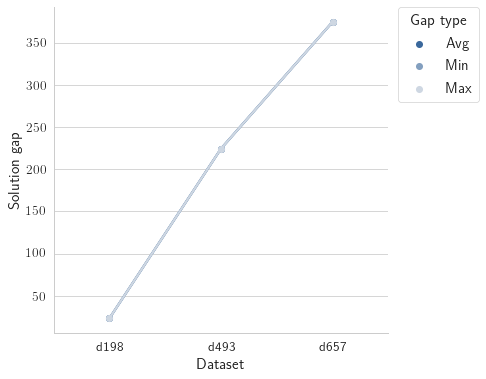

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

### timeout_ms: 60000

In [ ]:
timeout_ms = 60000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-60000-not_interrupted


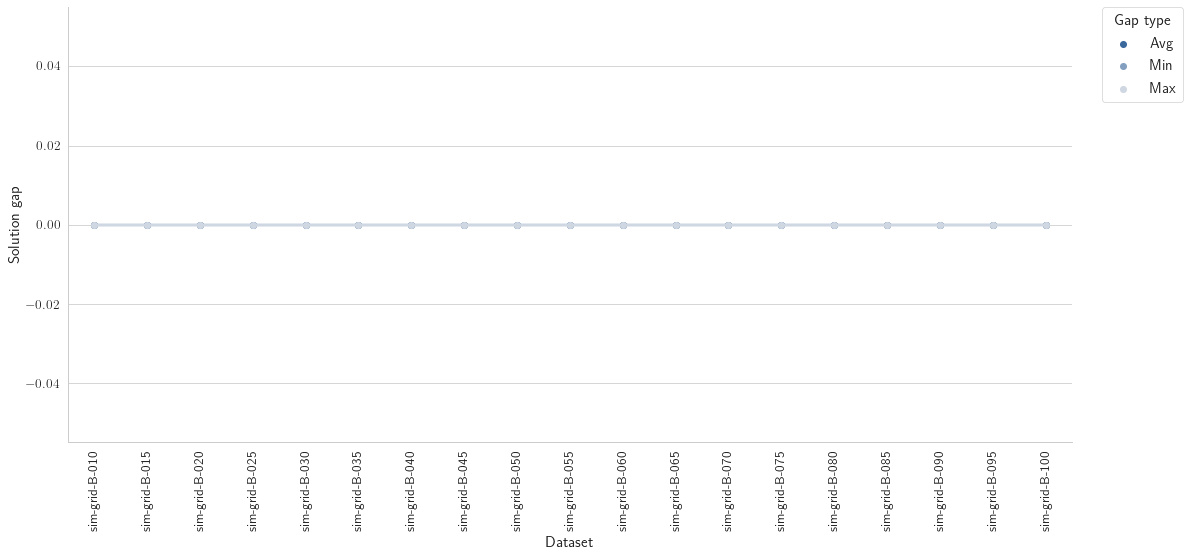

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex1_cplex, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-simulated-gap_divergence-ms-60000-interrupted


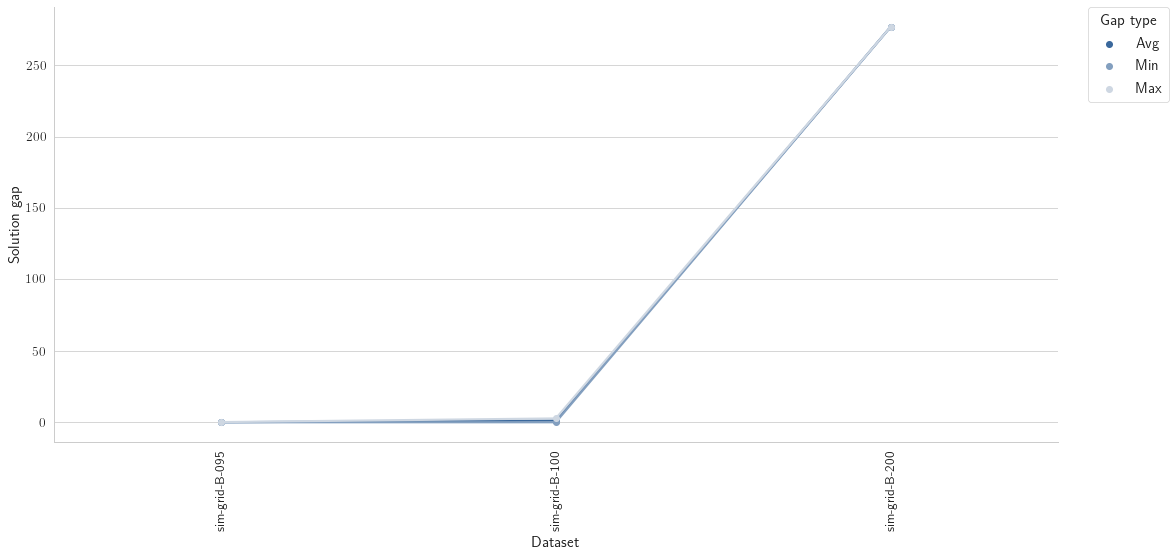

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex1-cplex-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex1-cplex-non_simulated-gap_divergence-ms-60000-interrupted


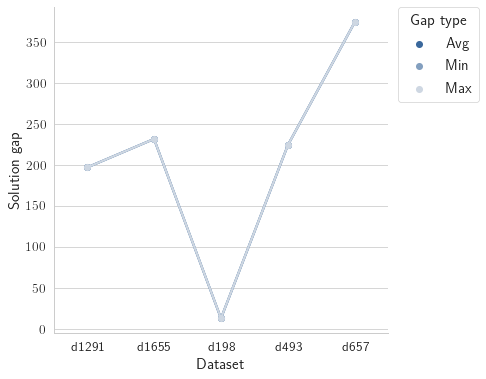

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex1-cplex-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

## Solution gap plot: ex2-metaheuristic

### timeout_ms: 100

In [ ]:
timeout_ms = 100

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-100-not_interrupted


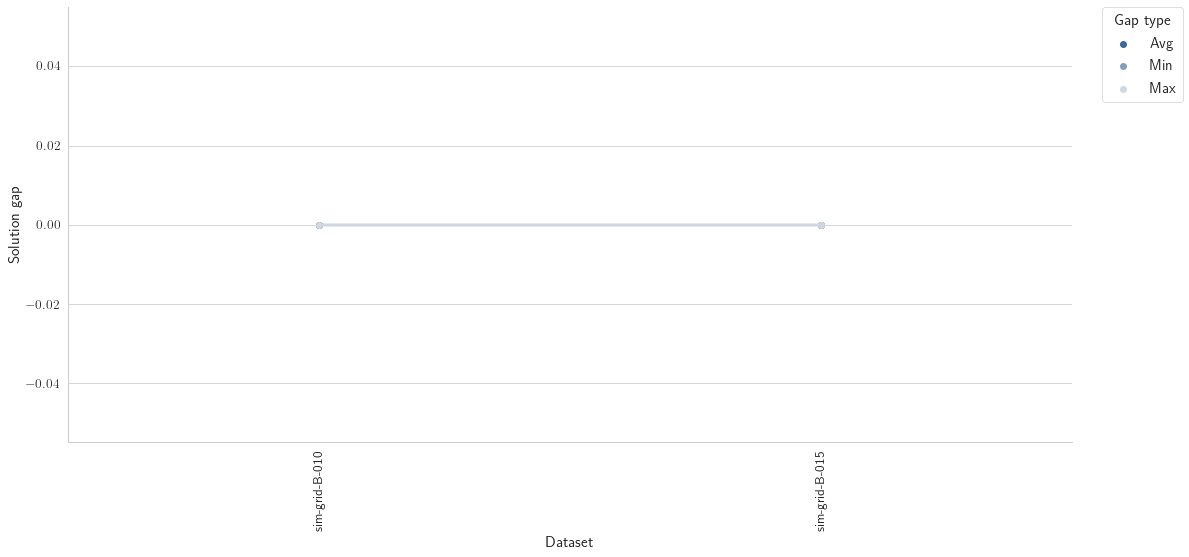

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-100-interrupted


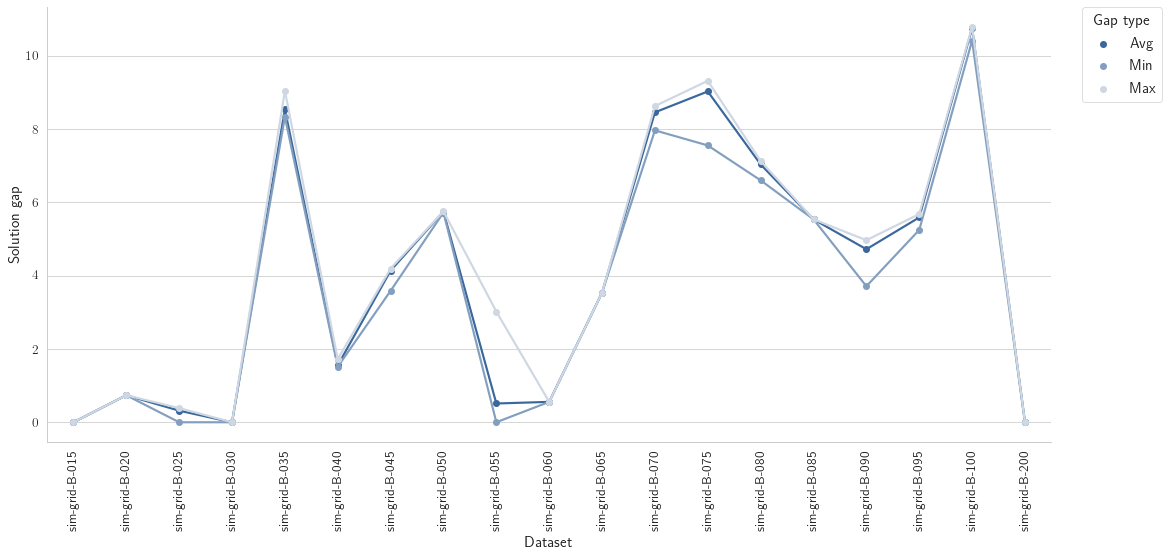

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-100-interrupted


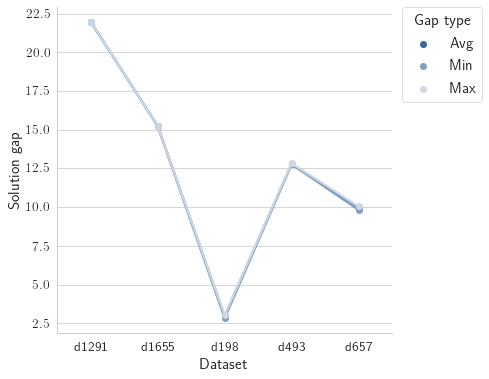

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

### timeout_ms: 1000

In [ ]:
timeout_ms = 1000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-1000-not_interrupted


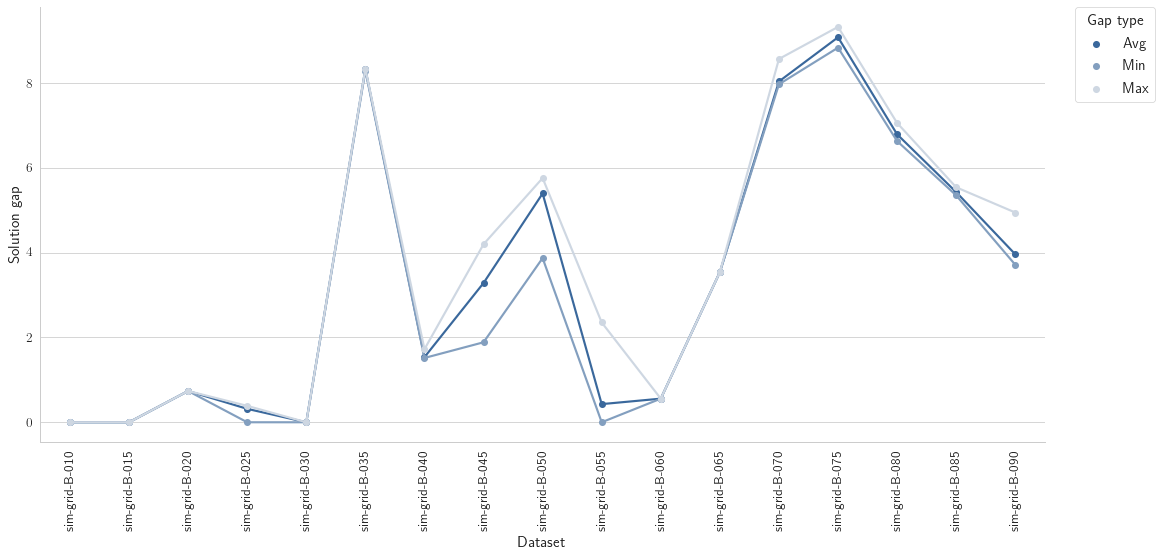

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-1000-interrupted


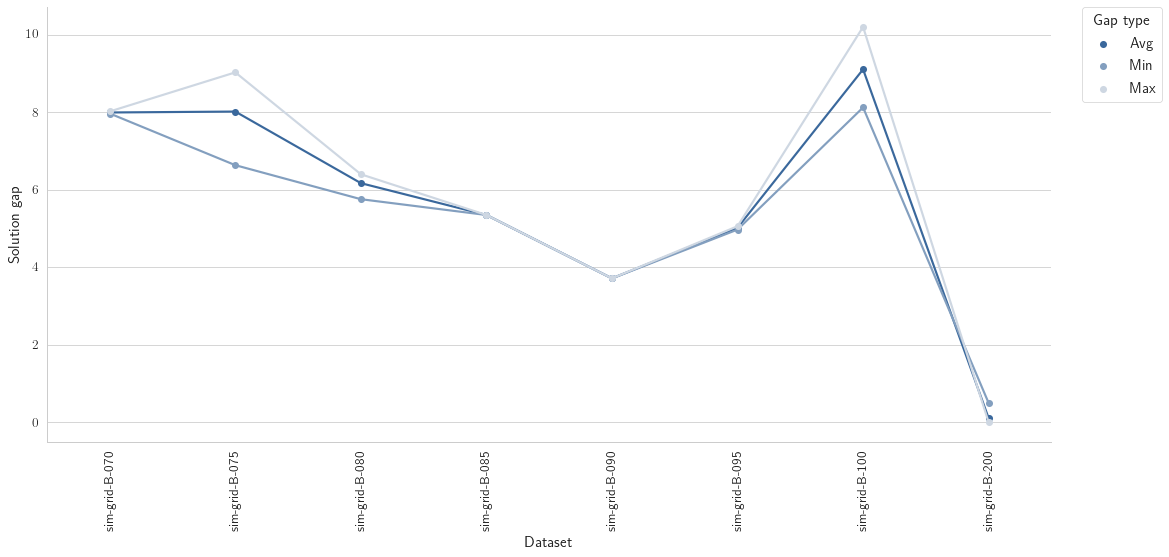

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-1000-interrupted


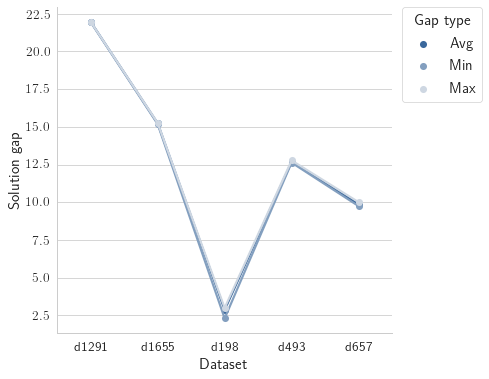

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

### timeout_ms: 10000

In [ ]:
timeout_ms = 10000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-10000-not_interrupted


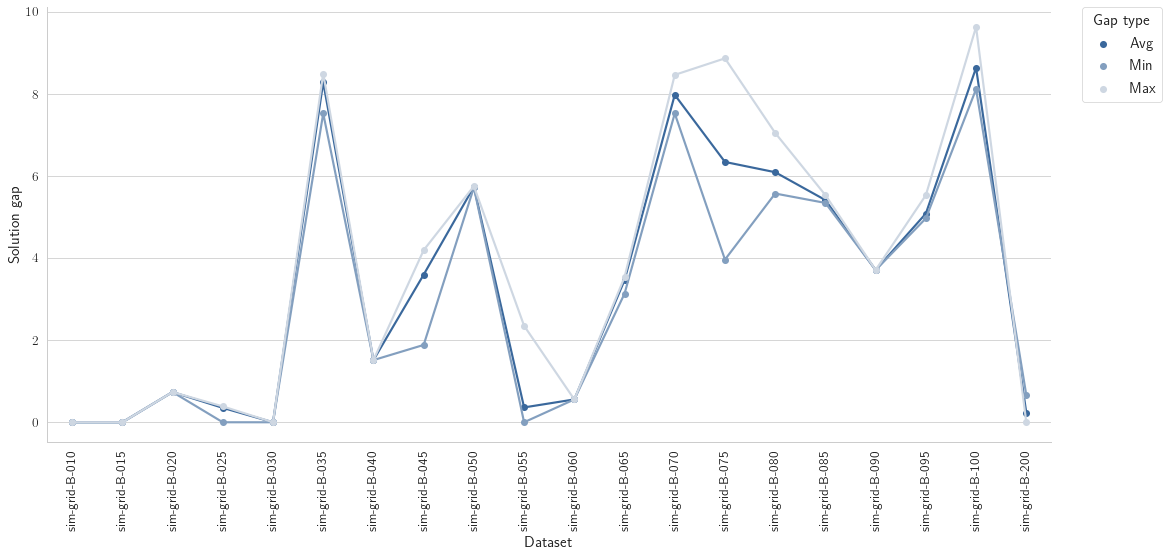

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-10000-not_interrupted


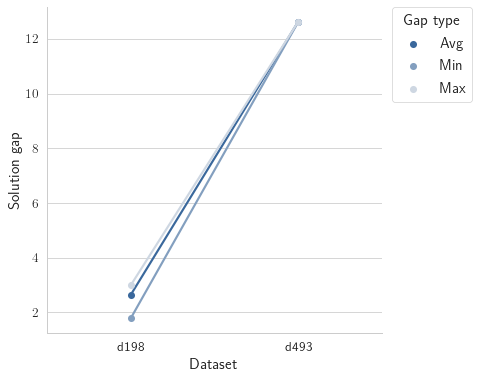

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-10000-interrupted


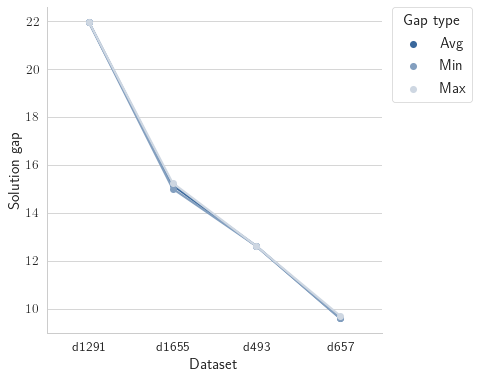

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

### timeout_ms: 60000

In [ ]:
timeout_ms = 60000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-simulated-gap_divergence-ms-60000-not_interrupted


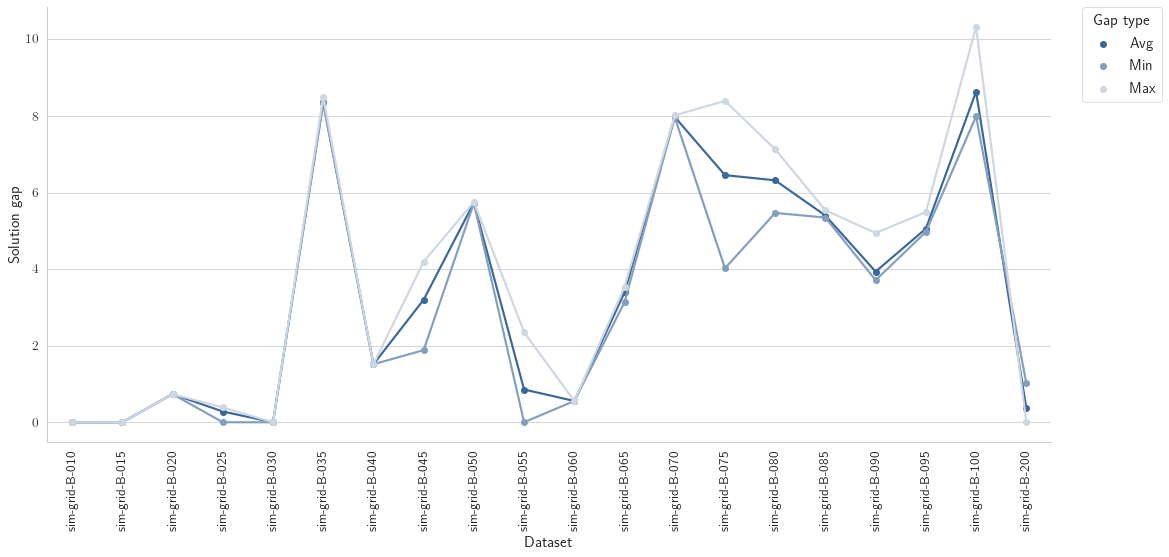

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-60000-not_interrupted


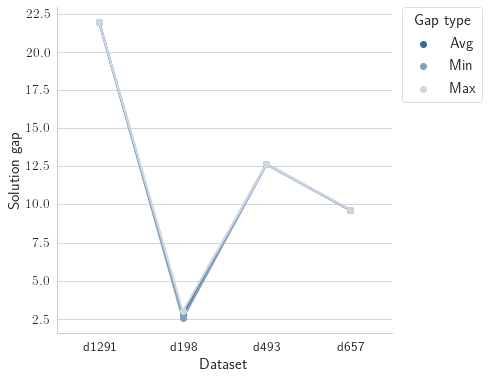

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
divergence_df = compute_gap_divergence(df=df_ex2_metaheuristic, timeout_ms=timeout_ms,
                                       was_interrupted=was_interrupted)
divergence_df_simulated = filter_simulated_datasets(df=divergence_df,
                                                    simulated=True)
divergence_df_non_simulated = filter_simulated_datasets(df=divergence_df,
                                                        simulated=False)

In [ ]:
plot_gap_divergence(divergence_df_simulated, size_inches=(18, 8), xrotation=90,
                    prefix='ex2-metaheuristic-simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

No data available


/content/drive/MyDrive/tsp-benchmark/plots/ex2-metaheuristic-non_simulated-gap_divergence-ms-60000-interrupted


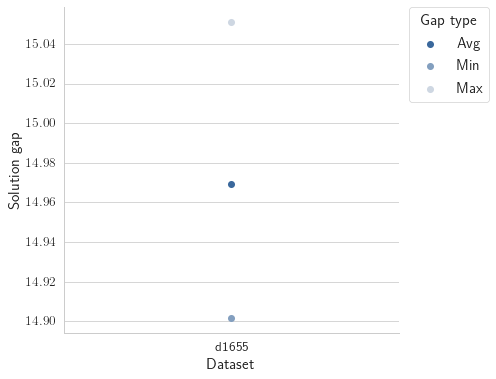

In [ ]:
plot_gap_divergence(divergence_df_non_simulated, size_inches=(6, 6), xrotation=0,
                    prefix='ex2-metaheuristic-non_simulated',
                    suffix=f'ms-{timeout_ms}-{interrupted_to_str(was_interrupted)}')

In [ ]:
import locale

pd.options.display.precision = 2
pd.options.display.float_format = lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip(locale.localeconv()['decimal_point']).replace(',', '')

In [ ]:
columns = ['dataset', 'mean_ms', 'std_ms', 'mean_solution', 'std_solution', 'mean_gap']

## Statistics tables: ex1-cplex

In [ ]:
df = df_ex1_cplex

### timeout_ms: 100

In [ ]:
timeout_ms = 100

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-020,111.27,0.79,6667.00,0.00,36.40
1,sim-grid-B-025,112.64,5.64,13500.00,0.00,174.61
2,sim-grid-B-030,111.55,2.84,13294.00,0.00,159.90
3,sim-grid-B-035,126.64,4.72,15989.00,0.00,146.71
4,sim-grid-B-040,125.09,1.58,15852.00,0.00,172.93
5,sim-grid-B-045,130.36,15.60,16265.00,0.00,147.23
6,sim-grid-B-050,124.91,1.92,19486.00,0.00,208.96
7,sim-grid-B-055,125.64,1.36,16744.00,0.00,143.09
8,sim-grid-B-060,128.18,7.28,20874.00,0.00,190.40
9,sim-grid-B-065,138.27,3.04,21379.00,0.00,187.62


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-020,111.27,0.79,"6,667",0,36.4
1,sim-grid-B-025,112.64,5.64,"13,500",0,174.61
2,sim-grid-B-030,111.55,2.84,"13,294",0,159.9
3,sim-grid-B-035,126.64,4.72,"15,989",0,146.71
4,sim-grid-B-040,125.09,1.58,"15,852",0,172.93
5,sim-grid-B-045,130.36,15.6,"16,265",0,147.23
6,sim-grid-B-050,124.91,1.92,"19,486",0,208.96
7,sim-grid-B-055,125.64,1.36,"16,744",0,143.09
8,sim-grid-B-060,128.18,7.28,"20,874",0,190.4
9,sim-grid-B-065,138.27,3.04,"21,379",0,187.62


### timeout_ms: 1000

In [ ]:
timeout_ms = 1000

#### Not interrupted

In [ ]:
was_interrupted = False 

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,56.36,1.36,3533.00,0.00,0.00
1,sim-grid-B-015,92.91,0.94,4235.00,0.00,0.00
2,sim-grid-B-020,206.64,1.43,4888.00,0.00,0.00
3,sim-grid-B-025,219.27,2.10,4916.00,0.00,0.00
4,sim-grid-B-035,393.82,3.37,6481.00,0.00,0.00


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-030,860.00,64.37,5115.00,0.00,0.00
1,sim-grid-B-030,1025.67,4.16,5344.33,166.08,4.48
2,sim-grid-B-040,1028.27,4.73,5835.64,61.49,0.48
3,sim-grid-B-045,962.00,16.97,6579.00,0.00,0.00
4,sim-grid-B-045,1027.33,8.11,6595.67,36.74,0.25
5,sim-grid-B-050,1037.91,7.31,9096.82,324.43,44.23
6,sim-grid-B-055,1046.73,4.20,8603.91,507.75,24.91
7,sim-grid-B-060,1045.91,1.45,20874.00,0.00,190.40
8,sim-grid-B-065,1055.55,6.36,12568.00,0.00,69.08
9,sim-grid-B-070,1060.64,0.92,14789.82,2480.23,96.02


### timeout_ms: 10000

In [ ]:
timeout_ms = 10000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,56.55,1.13,3533.00,0.00,0.00
1,sim-grid-B-015,92.55,1.04,4235.00,0.00,0.00
2,sim-grid-B-020,206.18,1.08,4888.00,0.00,0.00
3,sim-grid-B-025,219.55,1.75,4916.00,0.00,0.00
4,sim-grid-B-030,950.91,169.45,5115.00,0.00,0.00
5,sim-grid-B-035,408.00,25.31,6481.00,0.00,0.00
6,sim-grid-B-040,1310.00,161.54,5808.00,0.00,0.00
7,sim-grid-B-045,1066.73,132.96,6579.00,0.00,0.00
8,sim-grid-B-050,2963.45,239.23,6307.00,0.00,0.00
9,sim-grid-B-055,6602.82,650.35,6888.00,0.00,0.00


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-075,10060.91,6.41,17230.00,198.91,6.60
1,sim-grid-B-080,10072.18,3.31,22505.64,4373.23,43.27
2,sim-grid-B-085,10076.73,6.75,17425.00,0.00,7.10
3,sim-grid-B-090,10090.45,5.77,24440.00,6318.95,49.70
4,sim-grid-B-095,10092.82,8.32,25270.09,1982.97,45.89
5,sim-grid-B-100,10105.73,9.14,39819.73,4977.50,121.21
6,d198,10281.09,21.52,19461.00,0.00,23.33
7,sim-grid-B-200,10293.64,25.65,139539.00,0.00,276.83
8,d493,11822.36,27.45,113549.00,0.00,224.41
9,d657,13077.91,56.95,232159.00,0.00,374.65


### timeout_ms: 60000

In [ ]:
timeout_ms = 60000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,56.45,0.93,3533.00,0.00,0.00
1,sim-grid-B-015,92.09,0.94,4235.00,0.00,0.00
2,sim-grid-B-020,206.82,0.98,4888.00,0.00,0.00
3,sim-grid-B-025,218.55,1.51,4916.00,0.00,0.00
4,sim-grid-B-030,894.45,87.74,5115.00,0.00,0.00
5,sim-grid-B-035,394.91,2.63,6481.00,0.00,0.00
6,sim-grid-B-040,1228.27,82.85,5808.00,0.00,0.00
7,sim-grid-B-045,1023.55,58.04,6579.00,0.00,0.00
8,sim-grid-B-050,2953.09,333.04,6307.00,0.00,0.00
9,sim-grid-B-055,6759.27,659.74,6888.00,0.00,0.00


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-095,50271.86,4494.67,17321.00,0.00,0.00
1,sim-grid-B-095,60098.75,2.50,17326.00,10.00,0.03
2,sim-grid-B-100,50110.00,4640.79,18001.00,0.00,0.00
3,sim-grid-B-100,60088.80,33.55,18212.80,250.46,1.18
4,d198,60355.18,4.87,17802.82,13.58,12.82
5,sim-grid-B-200,60289.36,23.88,139539.00,0.00,276.83
6,d493,61749.73,6.08,113549.00,0.00,224.41
7,d657,63472.36,199.07,232159.00,0.00,374.65
8,d1291,80819.82,912.35,150852.00,0.00,196.95
9,d1655,87934.18,1984.21,206087.00,0.00,231.71


## Statistics tables: ex2-metaheuristic

In [ ]:
df = df_ex2_metaheuristic

### timeout_ms: 100

In [ ]:
timeout_ms = 100

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,59.73,0.79,3533.00,0.00,0.00


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-015,96.00,3.00,4235.00,0.00,0.00
1,sim-grid-B-015,101.50,0.53,4235.00,0.00,0.00
2,sim-grid-B-020,102.00,0.77,4924.00,0.00,0.74
3,sim-grid-B-025,102.91,0.83,4931.55,7.69,0.32
4,sim-grid-B-030,103.00,0.77,5115.00,0.00,0.00
5,sim-grid-B-035,103.45,0.93,7034.36,16.95,8.54
6,sim-grid-B-040,104.09,0.83,5898.18,4.85,1.55
7,sim-grid-B-045,103.73,0.65,6851.36,12.06,4.14
8,sim-grid-B-050,104.82,0.87,6669.45,0.93,5.75
9,sim-grid-B-055,105.00,1.18,6923.27,78.73,0.51


### timeout_ms: 1000

In [ ]:
timeout_ms = 1000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,61.82,8.05,3533.00,0.00,0.00
1,sim-grid-B-015,117.09,24.67,4235.00,0.00,0.00
2,sim-grid-B-020,137.27,1.10,4924.00,0.00,0.74
3,sim-grid-B-025,188.09,33.09,4931.55,7.69,0.32
4,sim-grid-B-030,217.09,3.30,5115.00,0.00,0.00
5,sim-grid-B-035,452.73,90.87,7020.45,1.21,8.32
6,sim-grid-B-040,399.64,92.75,5897.09,3.62,1.53
7,sim-grid-B-045,553.18,161.19,6794.91,53.02,3.28
8,sim-grid-B-050,583.64,123.03,6647.09,47.52,5.39
9,sim-grid-B-055,533.82,91.85,6917.45,65.53,0.43


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-070,719.78,108.84,8151.00,15.00,8.03
1,sim-grid-B-070,1007.50,0.71,8148.00,2.83,7.99
2,sim-grid-B-075,740.50,92.63,17629.50,55.86,9.07
3,sim-grid-B-075,1007.22,1.39,17458.56,130.91,8.02
4,sim-grid-B-080,814.33,63.04,16775.00,36.59,6.79
5,sim-grid-B-080,1008.88,1.64,16678.00,39.05,6.17
6,sim-grid-B-085,813.50,79.69,17152.40,16.01,5.42
7,sim-grid-B-085,1012.00,-,17140.00,-,5.35
8,sim-grid-B-090,928.40,47.19,16972.20,89.89,3.96
9,sim-grid-B-090,1009.83,0.75,16932.00,0.00,3.71


### timeout_ms: 10000

In [ ]:
timeout_ms = 10000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,58.91,0.83,3533.00,0.00,0.00
1,sim-grid-B-015,112.27,13.83,4235.00,0.00,0.00
2,sim-grid-B-020,139.45,2.02,4924.00,0.00,0.74
3,sim-grid-B-025,181.55,18.80,4933.27,5.73,0.35
4,sim-grid-B-030,216.00,1.67,5115.00,0.00,0.00
5,sim-grid-B-035,392.82,108.04,7018.27,16.92,8.29
6,sim-grid-B-040,398.09,41.83,5896.00,0.00,1.52
7,sim-grid-B-045,441.27,136.27,6815.73,41.64,3.60
8,sim-grid-B-050,534.27,150.00,6669.09,1.04,5.74
9,sim-grid-B-055,570.82,121.11,6912.91,56.54,0.36


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,d493,8622.57,733.67,39422.57,1.13,12.63
1,d493,10203.25,9.95,39423.00,0.00,12.63
2,d657,10431.73,15.70,53626.91,17.21,9.64
3,d1291,13394.27,83.21,61953.82,1.83,21.95
4,d1655,19681.36,254.01,71550.55,46.89,15.17


### timeout_ms: 60000

In [ ]:
timeout_ms = 60000

#### Not interrupted

In [ ]:
was_interrupted = False

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,sim-grid-B-010,58.91,1.04,3533.00,0.00,0.00
1,sim-grid-B-015,120.82,21.33,4235.00,0.00,0.00
2,sim-grid-B-020,137.82,1.17,4924.00,0.00,0.74
3,sim-grid-B-025,190.82,26.32,4929.82,8.87,0.28
4,sim-grid-B-030,215.91,2.43,5115.00,0.00,0.00
5,sim-grid-B-035,363.82,41.57,7023.00,4.45,8.36
6,sim-grid-B-040,398.73,74.91,5896.00,0.00,1.52
7,sim-grid-B-045,507.45,158.04,6789.55,55.17,3.20
8,sim-grid-B-050,529.73,99.36,6668.73,1.01,5.74
9,sim-grid-B-055,510.36,80.62,6946.91,81.73,0.86


#### Interrupted

In [ ]:
was_interrupted = True

In [ ]:
show_time_stats_by_timeout(df, timeout_ms=timeout_ms, was_interrupted=was_interrupted)[columns] \
  .reset_index(drop=True) \
  .style \
  .set_na_rep('-')

,dataset,mean_ms,std_ms,mean_solution,std_solution,mean_gap
0,d1655,69725.45,229.84,71428.00,38.85,14.97


## Pivot tables

In [ ]:
# aggregate_multiple_dataframe_solutions(timeout_ms, simulated) \
#   .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
#   .pivot_table(index=['dataset', 'program'],
#                 values=['mean_solution', 'min_solution', 'max_solution', 'mean_gap'],
#                 columns=[])

In [ ]:
timeout_ms = 100

In [ ]:
simulated = True

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,sim-grid-B-010,ex1-cplex,0,3533,3533,3533
1,sim-grid-B-010,ex2-metaheuristic,0,3533,3533,3533
2,sim-grid-B-010,random-baseline,57.94,5580.09,4578,5919
3,sim-grid-B-015,ex1-cplex,0,4235,4235,4235
4,sim-grid-B-015,ex2-metaheuristic,0,4235,4235,4235
5,sim-grid-B-015,random-baseline,108.81,8842.91,7136,9243
6,sim-grid-B-020,ex1-cplex,36.4,6667,6667,6667
7,sim-grid-B-020,ex2-metaheuristic,0.74,4924,4924,4924
8,sim-grid-B-020,random-baseline,182.04,13785.91,13372,13865
9,sim-grid-B-025,ex1-cplex,174.61,13500,13500,13500


In [ ]:
simulated = False

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,d1291,ex1-cplex,nan,nan,nan,nan
1,d1291,ex2-metaheuristic,21.96,61958.82,61957,61959
2,d1291,random-baseline,196.95,150852,150852,150852
3,d1655,ex1-cplex,nan,nan,nan,nan
4,d1655,ex2-metaheuristic,15.25,71604.91,71591,71608
5,d1655,random-baseline,231.71,206087,206087,206087
6,d198,ex1-cplex,nan,nan,nan,nan
7,d198,ex2-metaheuristic,2.97,16248.27,16225,16256
8,d198,random-baseline,42.57,22498,22498,22498
9,d493,ex1-cplex,nan,nan,nan,nan


In [ ]:
timeout_ms = 1000

In [ ]:
simulated = True

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,sim-grid-B-010,ex1-cplex,0,3533,3533,3533
1,sim-grid-B-010,ex2-metaheuristic,0,3533,3533,3533
2,sim-grid-B-010,random-baseline,58.97,5616.45,4837,5919
3,sim-grid-B-015,ex1-cplex,0,4235,4235,4235
4,sim-grid-B-015,ex2-metaheuristic,0,4235,4235,4235
5,sim-grid-B-015,random-baseline,102.11,8559.36,7154,9243
6,sim-grid-B-020,ex1-cplex,0,4888,4888,4888
7,sim-grid-B-020,ex2-metaheuristic,0.74,4924,4924,4924
8,sim-grid-B-020,random-baseline,182.38,13802.91,13182,13865
9,sim-grid-B-025,ex1-cplex,0,4916,4916,4916


In [ ]:
simulated = False

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,d1291,ex1-cplex,nan,nan,nan,nan
1,d1291,ex2-metaheuristic,21.96,61958,61954,61959
2,d1291,random-baseline,196.95,150852,150852,150852
3,d1655,ex1-cplex,nan,nan,nan,nan
4,d1655,ex2-metaheuristic,15.24,71594.73,71560,71608
5,d1655,random-baseline,231.71,206087,206087,206087
6,d198,ex1-cplex,42.57,22498,22498,22498
7,d198,ex2-metaheuristic,2.86,16232,16143,16252
8,d198,random-baseline,42.57,22498,22498,22498
9,d493,ex1-cplex,nan,nan,nan,nan


In [ ]:
timeout_ms = 10000

In [ ]:
simulated = True

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,sim-grid-B-010,ex1-cplex,0,3533,3533,3533
1,sim-grid-B-010,ex2-metaheuristic,0,3533,3533,3533
2,sim-grid-B-010,random-baseline,62.46,5739.55,5008,5919
3,sim-grid-B-015,ex1-cplex,0,4235,4235,4235
4,sim-grid-B-015,ex2-metaheuristic,0,4235,4235,4235
5,sim-grid-B-015,random-baseline,108.4,8825.91,7855,9243
6,sim-grid-B-020,ex1-cplex,0,4888,4888,4888
7,sim-grid-B-020,ex2-metaheuristic,0.74,4924,4924,4924
8,sim-grid-B-020,random-baseline,183.65,13865,13865,13865
9,sim-grid-B-025,ex1-cplex,0,4916,4916,4916


In [ ]:
simulated = False

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,d1291,ex1-cplex,nan,nan,nan,nan
1,d1291,ex2-metaheuristic,21.95,61953.82,61952,61957
2,d1291,random-baseline,196.95,150852,150852,150852
3,d1655,ex1-cplex,nan,nan,nan,nan
4,d1655,ex2-metaheuristic,15.17,71550.55,71461,71608
5,d1655,random-baseline,231.71,206087,206087,206087
6,d198,ex1-cplex,23.33,19461,19461,19461
7,d198,ex2-metaheuristic,2.64,16196.64,16061,16252
8,d198,random-baseline,42.57,22498,22498,22498
9,d493,ex1-cplex,224.41,113549,113549,113549


In [ ]:
timeout_ms = 60000

In [ ]:
simulated = True

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,sim-grid-B-010,ex1-cplex,0,3533,3533,3533
1,sim-grid-B-010,ex2-metaheuristic,0,3533,3533,3533
2,sim-grid-B-010,random-baseline,61.17,5694.18,4963,5919
3,sim-grid-B-015,ex1-cplex,0,4235,4235,4235
4,sim-grid-B-015,ex2-metaheuristic,0,4235,4235,4235
5,sim-grid-B-015,random-baseline,110.57,8917.55,7381,9243
6,sim-grid-B-020,ex1-cplex,0,4888,4888,4888
7,sim-grid-B-020,ex2-metaheuristic,0.74,4924,4924,4924
8,sim-grid-B-020,random-baseline,180.28,13700,12300,13865
9,sim-grid-B-025,ex1-cplex,0,4916,4916,4916


In [ ]:
simulated = False

In [ ]:
aggregate_multiple_dataframe_solutions(timeout_ms=timeout_ms,
                                       simulated=simulated) \
  .sort_values(by=['dataset'], axis=0, ascending=True) \
  .assign(mean_gap=lambda df: compute_mean_gap_in_df(df)) \
  .reset_index(drop=True)[['dataset', 'program', 'mean_gap', 'mean_solution', 'min_solution', 'max_solution']] \
  # .style \
  # .set_na_rep('-') \
  # .pivot_table(index=['dataset', 'program'],
  #               values=['mean_solution', 'min_solution', 'max_solution'],
  #               columns=[])

,dataset,program,mean_gap,mean_solution,min_solution,max_solution
0,d1291,ex1-cplex,196.95,150852,150852,150852
1,d1291,ex2-metaheuristic,21.95,61952.18,61952,61954
2,d1291,random-baseline,196.95,150852,150852,150852
3,d1655,ex1-cplex,231.71,206087,206087,206087
4,d1655,ex2-metaheuristic,14.97,71428,71386,71479
5,d1655,random-baseline,231.71,206087,206087,206087
6,d198,ex1-cplex,12.82,17802.82,17791,17817
7,d198,ex2-metaheuristic,2.8,16221.73,16179,16252
8,d198,random-baseline,42.57,22498,22498,22498
9,d493,ex1-cplex,224.41,113549,113549,113549


In [ ]:
import math


def decay(x: int):
  a = 2
  b = 0.6
  c = 1.7
  return math.log(1 + a*x) * (b**c)

def show_decay(x: int, n: int):
  prec = x
  for i in range(n + 1):
    print(f'#{i} \t{prec}')
    prec = decay(prec)

show_decay(x=1, n=50)

#0 	1
#1 	0.46100069297572244
#2 	0.2741664711593971
#3 	0.18344938077899786
#4 	0.13115020721938916
#5 	0.09774472584475895
#6 	0.07492569958720685
#7 	0.05859280791193591
#8 	0.046499318009527155
#9 	0.03731477354748033
#10 	0.030202632756763055
#11 	0.02461125380567928
#12 	0.020162541946200173
#13 	0.016588976400000177
#14 	0.013696193020693439
#15 	0.011339805425821449
#16 	0.009410524385571961
#17 	0.007824303711770852
#18 	0.006515634581600875
#19 	0.005432870863423083
#20 	0.004534899331708028
#21 	0.003788721591154075
#22 	0.003167667325752986
#23 	0.0026500532670731673
#24 	0.002218162479590674
#25 	0.0018574576320925535
#26 	0.0015559677814069258
#27 	0.001303805616970309
#28 	0.001092784050413339
#29 	0.0009161093392148881
#30 	0.0007681337970913414
#31 	0.000644155341506093
#32 	0.000540254173705672
#33 	0.00045315912355090135
#34 	0.000380137854521194
#35 	0.0003189063750795141
#36 	0.000267554253651292
#37 	0.0002244826651197677
#38 	0.00018835296352897094
#39 	0.0001580